# **CIS 545 Final Project**
by Elisa Zhang, Nick Kuo, Sara Asgari


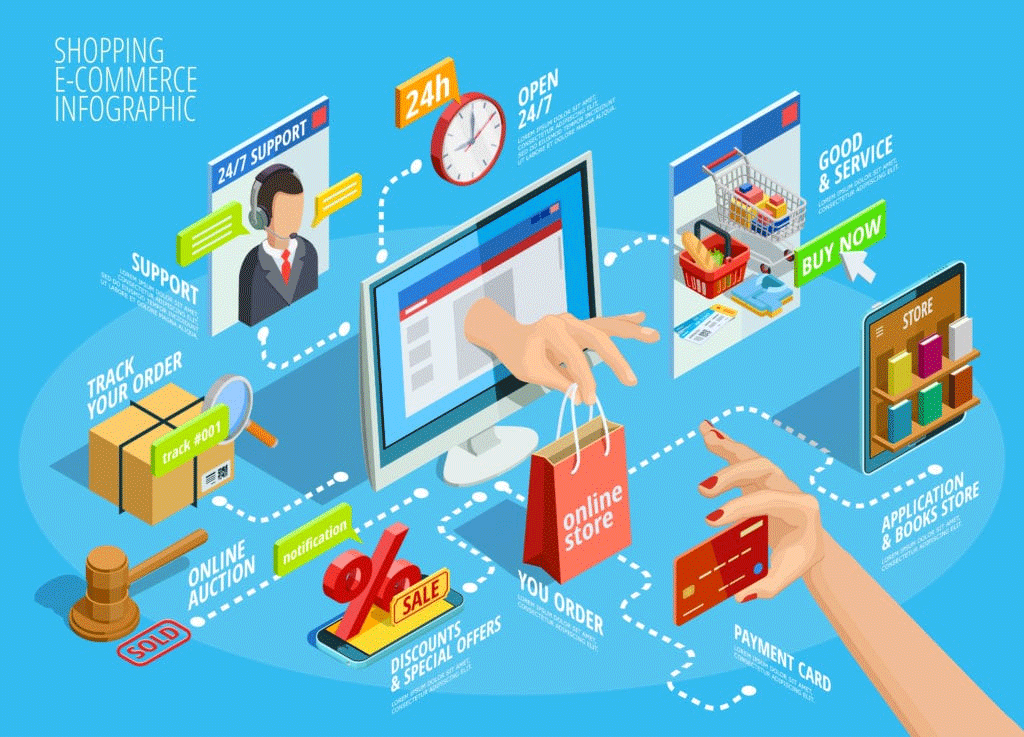

https://www.cloudways.com/blog/what-is-ecommerce/ 

Welcome to our 545 Final Project! In this project, we work with 5 datasets all focused on e-commerce, starting off with an international e-commerce data on consumer behavior and then diving into 4 separate datasets about e-commerce in specific countries. 

Accelerated by COVID, e-commerce is, and continues to be, rapidly increasing in prelevance and importance. We chose to focus on this topic for this reason. Throughout our project, we are interested in identifying various trends in consumer e-commerce behavior, whether it be across categories, time, countries, or other dimensions. Furthermore, we also use modelling techniques to try to predict these behaviors. 

Using data on e-commerce purchases from 2019 to 2020, we aim to gain insights into how consumers behave on e-commerce websites by analyzing their purchasing habits such as their willingness to pay and value placed on a product’s brand. The data analyzed from these e-commerce purchases can be used to support companies that use e-commerce in regards with their marketing, pricing schemes, product design, and more. 


# Setup and Imports

To begin working with our datasets, we will import the libraries we will be using, mount our drive, unzip the zip files containing our datasets, and read the csv files.



In [ ]:
import os
import json
import gzip
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
from urllib.request import urlopen

Click [HERE](https://drive.google.com/drive/folders/1XVjRu_A9bE9ZftmHYn0ofXWnPbPvZr8a?usp=sharing) for the Drive Folder link containing all our datasets, one CSV file and 4 zip files. To run, add a shortcut to this folder in your Drive. 

Note: The original international dataset started off with 67 million entries. In order to decrease our dataset to work with our data we ran the following code in the commented section. This code imported the csv file into pandas, dropped the csv's nulls, and then exported the csv of the pandas dataframe into the drive folder linked above. 

In [ ]:
# international_ecommerce_df = pd.read_csv('/content/drive/MyDrive/CIS_545_Project/2019-Nov.csv')
# international_ecommerce_df.shape --> SIZE: (67501979, 9)
# international_ecommerce_df = international_ecommerce_df.dropna()
# international_ecommerce_df.shape --> SIZE: (42089564, 9)
# df.to_csv('data.csv')
# !cp data.csv "drive/MyDrive/data"

In [ ]:
# Mount the Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# Read the csv file for the international e-commerce dataset that has been decreased in size
international_ecommerce_df = pd.read_csv('/content/gdrive/MyDrive/data/data.csv')

In [ ]:
# Unzip the reminaing 4 datasets regarding specific countries we will also be working with
!unzip gdrive/MyDrive/data/brazil.zip
!unzip gdrive/MyDrive/data/india.zip
!unzip gdrive/MyDrive/data/pakistan.zip
!unzip gdrive/MyDrive/data/unitedstates.zip

Archive:  gdrive/MyDrive/data/brazil.zip
  inflating: olist_customers_dataset.csv  
  inflating: olist_geolocation_dataset.csv  
  inflating: olist_order_items_dataset.csv  
  inflating: olist_order_payments_dataset.csv  
  inflating: olist_order_reviews_dataset.csv  
  inflating: olist_orders_dataset.csv  
  inflating: olist_products_dataset.csv  
  inflating: olist_sellers_dataset.csv  
  inflating: product_category_name_translation.csv  
Archive:  gdrive/MyDrive/data/india.zip
  inflating: List of Orders.csv      
  inflating: Order Details.csv       
  inflating: Sales target.csv        
Archive:  gdrive/MyDrive/data/pakistan.zip
  inflating: Pakistan Largest Ecommerce Dataset.csv  
Archive:  gdrive/MyDrive/data/unitedstates.zip
  inflating: US  E-commerce records 2020.csv  


In [ ]:
# Read csvs for Pakistan and US datasets 
pakistan_df = pd.read_csv('Pakistan Largest Ecommerce Dataset.csv')
united_states_df = pd.read_csv('US  E-commerce records 2020.csv',encoding= 'unicode_escape')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1,2,3,7,8,9,11,12,13,14,17,18,19) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
# Read csv's for the two India datasets that will later require some joins
india_order_list_df = pd.read_csv('List of Orders.csv')
india_order_details_df = pd.read_csv('Order Details.csv')

In [ ]:
# Read csv's for the 6 Brazil dataset that will later require multiple joins
brazil_customer_df = pd.read_csv('olist_customers_dataset.csv')
brazil_order_items_df = pd.read_csv('olist_order_items_dataset.csv')
brazil_order_reviews_df = pd.read_csv('olist_order_reviews_dataset.csv')
brazil_orders_dataset_df = pd.read_csv('olist_orders_dataset.csv')
brazil_products_dataset_df = pd.read_csv('olist_products_dataset.csv')
brazil_products_translation_df = pd.read_csv('product_category_name_translation.csv')

In [ ]:
!unzip gdrive/MyDrive/data/phone.zip

Archive:  gdrive/MyDrive/data/phone.zip
  inflating: Amazon_Unlocked_Mobile.csv  


# Section 1: International e-commmerce data

Now that all of our data is in this notebook, we are ready to get started! We first will be looking at the international e-commerce data. 

## Data Cleaning and Wrangling

In [ ]:
international_ecommerce_df = international_ecommerce_df.drop(columns=['user_session'])
international_ecommerce_df = international_ecommerce_df.drop(columns=['Unnamed: 0'])

In [ ]:
international_ecommerce_df

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id
0,2019-11-01 00:00:00 UTC,view,1003461,2053013555631882655,electronics.smartphone,xiaomi,489.07,520088904
1,2019-11-01 00:00:00 UTC,view,5000088,2053013566100866035,appliances.sewing_machine,janome,293.65,530496790
2,2019-11-01 00:00:01 UTC,view,3601530,2053013563810775923,appliances.kitchen.washer,lg,712.87,518085591
3,2019-11-01 00:00:01 UTC,view,1004775,2053013555631882655,electronics.smartphone,xiaomi,183.27,558856683
4,2019-11-01 00:00:01 UTC,view,1306894,2053013558920217191,computers.notebook,hp,360.09,520772685
...,...,...,...,...,...,...,...,...
42089559,2019-11-30 23:59:57 UTC,view,12301059,2053013556311359947,construction.tools.drill,bosch,266.16,562661595
42089560,2019-11-30 23:59:58 UTC,view,28719425,2053013565639492569,apparel.shoes,baden,62.81,545223467
42089561,2019-11-30 23:59:59 UTC,view,1004833,2053013555631882655,electronics.smartphone,samsung,167.03,557794415
42089562,2019-11-30 23:59:59 UTC,view,2701706,2053013563911439225,appliances.kitchen.refrigerators,samsung,566.27,531607492


In [ ]:
international_ecommerce_category_count = international_ecommerce_df.groupby(['category_code'])['user_id'].count().to_frame().reset_index()

## Exploratory Data Analysis (EDA)

After cleaning the international ecommerce dataset, we move forward to conduct EDA. Our hypothesis is that due to the increased shift into the technological age, the top internationally sold products in November 2019 will be electronics, particularly with a skew toward smartphones. We aim to explore a variety dimensions of across the data, which include EDA on time series of average purchase price, time series of total international purchases, bar charts on most popular items sold, box and whisker plot on the distribution of ecommerce pricing, correlation between ecommerce transaction and price, and more. Our goal is to identify the most popular products that are being bought in the ecommerce business on an international front, as well as the price in which customers are willing to purchase these products.

In [ ]:
international_ecommerce_category_count = international_ecommerce_category_count.rename(columns={"user_id": 'Number Purchases'})
international_ecommerce_category_count = international_ecommerce_category_count.sort_values(['Number Purchases'], ascending = False)
international_ecommerce_top20 = international_ecommerce_category_count.head(20)
international_ecommerce_top20

,category_code,Number Purchases
100,electronics.smartphone,16353579
104,electronics.video.tv,2195118
72,computers.notebook,2164657
99,electronics.clocks,1811325
93,electronics.audio.headphone,1803893
12,apparel.shoes,1587667
29,appliances.environment.vacuum,1510004
50,appliances.kitchen.washer,1389808
47,appliances.kitchen.refrigerators,1149533
70,computers.desktop,647867


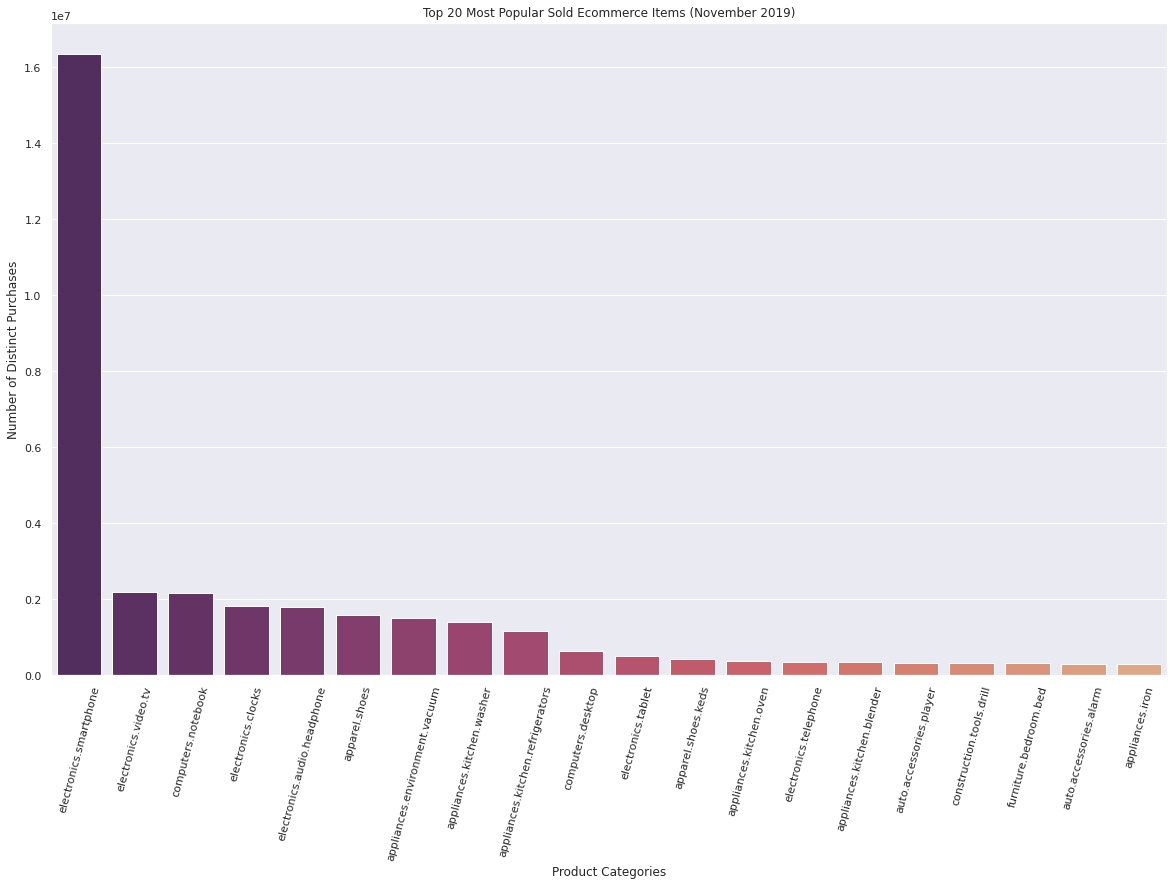

In [ ]:
# Plot top 20 Ecommerce products based on quantity purchased in November
plt.figure(figsize=(20,12))
sns.set(font_scale = 1)
bar = sns.barplot(x="category_code", y="Number Purchases", data=international_ecommerce_top20, ci=None, dodge=True, palette = 'flare_r')
bar.set_title('Top 20 Most Popular Sold Ecommerce Items (November 2019)')
bar.set(xlabel='Product Categories', ylabel='Number of Distinct Purchases')
for item in bar.get_xticklabels():
    item.set_rotation(75)

In [ ]:
totalNumPurchases = international_ecommerce_category_count['Number Purchases'].sum()
international_ecommerce_top20['Percent of Total Purchases'] = international_ecommerce_category_count[['Number Purchases']] / totalNumPurchases

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


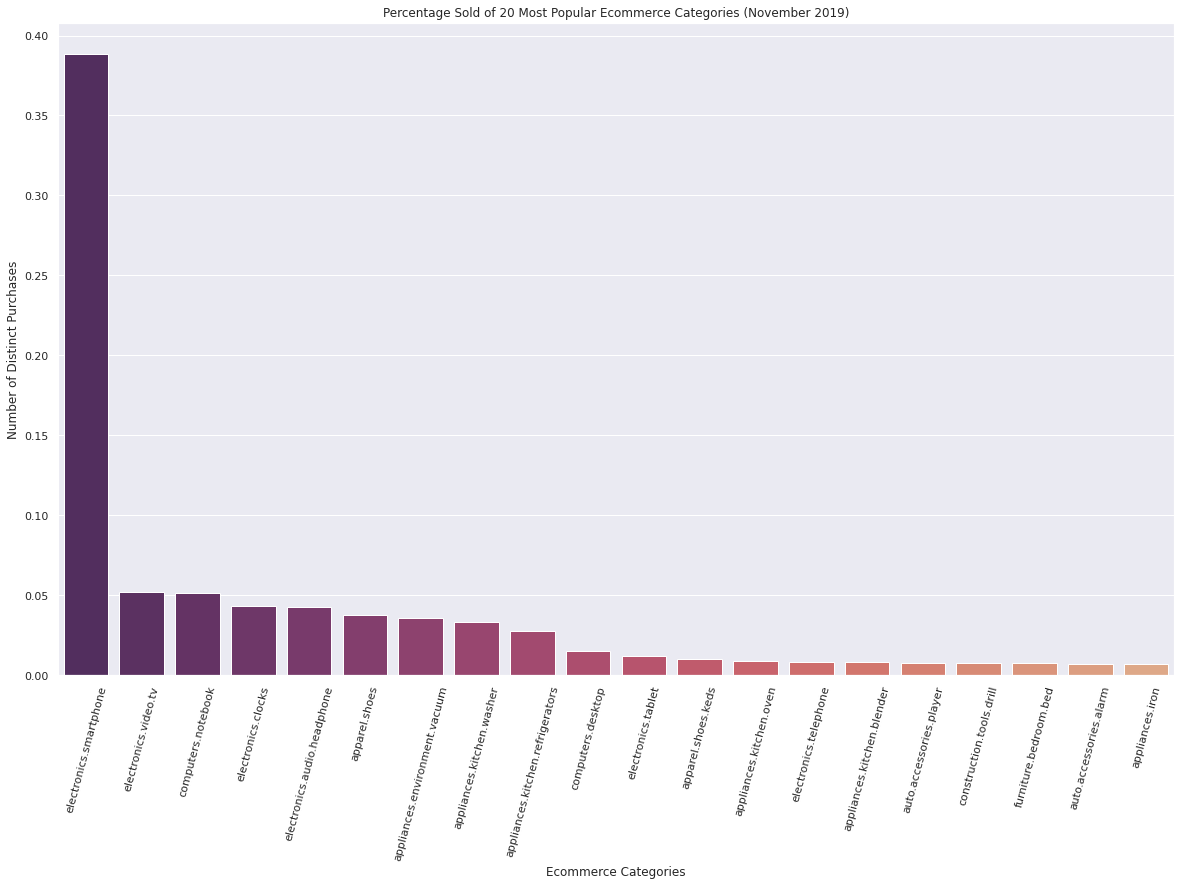

In [ ]:
# Plot top 20 Products' percentages
plt.figure(figsize=(20,12))
sns.set(font_scale = 1)
bar = sns.barplot(x="category_code", y="Percent of Total Purchases", data=international_ecommerce_top20, ci=None, dodge=True, palette = 'flare_r')
bar.set_title('Percentage Sold of 20 Most Popular Ecommerce Categories (November 2019)')
bar.set(xlabel='Ecommerce Categories', ylabel='Number of Distinct Purchases')
for item in bar.get_xticklabels():
    item.set_rotation(75)

In [ ]:
# Covert time to datetime (TAKES 7+ MINUTES TO RUN)
international_ecommerce_df['event_time'] = pd.to_datetime(international_ecommerce_df['event_time']).dt.date
international_ecommerce_df.dtypes

event_time        object
event_type        object
product_id         int64
category_id        int64
category_code     object
brand             object
price            float64
user_id            int64
dtype: object

In [ ]:
international_ecommerce_df

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id
0,2019-11-01,view,1003461,2053013555631882655,electronics.smartphone,xiaomi,489.07,520088904
1,2019-11-01,view,5000088,2053013566100866035,appliances.sewing_machine,janome,293.65,530496790
2,2019-11-01,view,3601530,2053013563810775923,appliances.kitchen.washer,lg,712.87,518085591
3,2019-11-01,view,1004775,2053013555631882655,electronics.smartphone,xiaomi,183.27,558856683
4,2019-11-01,view,1306894,2053013558920217191,computers.notebook,hp,360.09,520772685
...,...,...,...,...,...,...,...,...
42089559,2019-11-30,view,12301059,2053013556311359947,construction.tools.drill,bosch,266.16,562661595
42089560,2019-11-30,view,28719425,2053013565639492569,apparel.shoes,baden,62.81,545223467
42089561,2019-11-30,view,1004833,2053013555631882655,electronics.smartphone,samsung,167.03,557794415
42089562,2019-11-30,view,2701706,2053013563911439225,appliances.kitchen.refrigerators,samsung,566.27,531607492


In [ ]:
international_ecommerce_time_purchase_df = international_ecommerce_df.groupby(['event_time'])['user_id'].count().reset_index()

In [ ]:
international_ecommerce_time_purchase_df = international_ecommerce_time_purchase_df.rename(columns={'user_id':'Number of Transactions'})
international_ecommerce_time_purchase_df = international_ecommerce_time_purchase_df.rename(columns={'event_time':'Date'})
international_ecommerce_time_purchase_df

,Date,Number of Transactions
0,2019-11-01,897686
1,2019-11-02,960658
2,2019-11-03,982167
3,2019-11-04,1101573
4,2019-11-05,1031735
5,2019-11-06,1022542
6,2019-11-07,1080119
7,2019-11-08,1177376
8,2019-11-09,1164871
9,2019-11-10,1204700


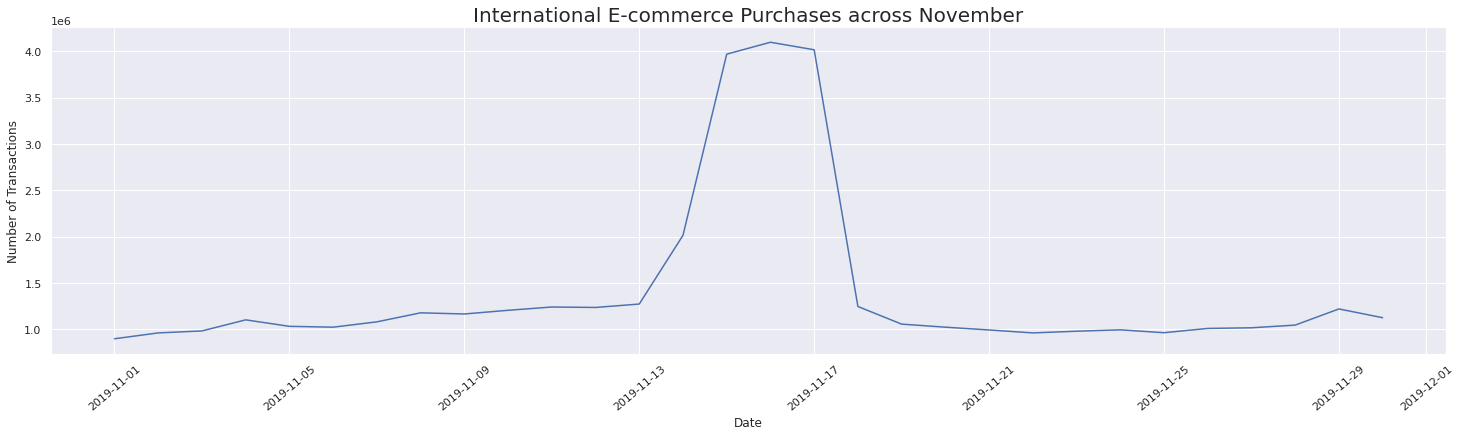

In [ ]:
sns.set(font_scale = 1)
plt.figure(figsize=(25,6))
line_plot = sns.lineplot(x='Date', y='Number of Transactions', data=international_ecommerce_time_purchase_df, ci=None, palette = 'flare_r')
line_plot.set_title('International E-commerce Purchases across November', fontsize=20)
for item in line_plot.get_xticklabels():
    item.set_rotation(40)

In [ ]:
international_ecommerce_time_price_df = international_ecommerce_df.groupby(['event_time'])['price'].mean().reset_index()
international_ecommerce_time_price_df['price'] = international_ecommerce_time_price_df['price'].round(2)
international_ecommerce_time_price_df = international_ecommerce_time_price_df.rename(columns={'event_time':'Date'})
international_ecommerce_time_price_df = international_ecommerce_time_price_df.rename(columns={'price':'Price'})

In [ ]:
international_ecommerce_time_price_df

,Date,Price
0,2019-11-01,361.29
1,2019-11-02,357.46
2,2019-11-03,365.96
3,2019-11-04,374.04
4,2019-11-05,368.14
5,2019-11-06,365.95
6,2019-11-07,358.92
7,2019-11-08,362.00
8,2019-11-09,359.53
9,2019-11-10,364.18


Note: We opt not to plot every price point across time due to the RAM constraints of collab. In order to gague general trends of the ecommerce prices that international consumers were willing to pay, we first plot a time series graph of average prices consumers were willing to pay, and then, we use the time series stationary technique of smoothing with moving averages. In order to use this time series data for potential forecasting, we will use Auto-Regressive Integrated moving Averages (ARIMA) forecasting. 

Text(0.5, 1.0, 'International E-commerce Average Purchase Price across November')

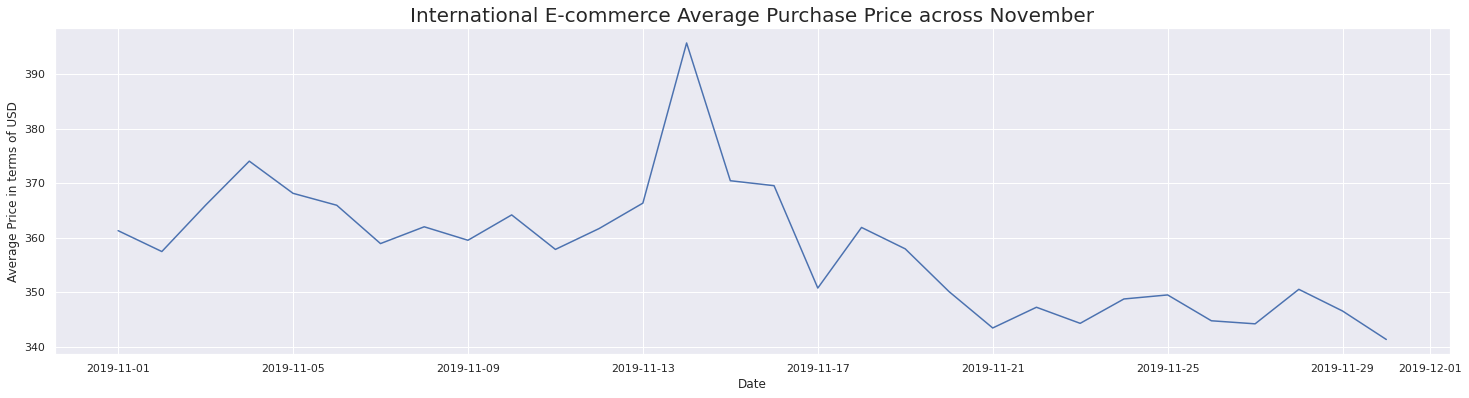

In [ ]:
sns.set(font_scale = 1)
plt.figure(figsize=(25,6))
line_plot = sns.lineplot(x='Date', y='Price', data=international_ecommerce_time_price_df, ci=None, palette = 'flare_r')
line_plot.set_ylabel('Average Price in terms of USD')
line_plot.set_title('International E-commerce Average Purchase Price across November', fontsize=20)

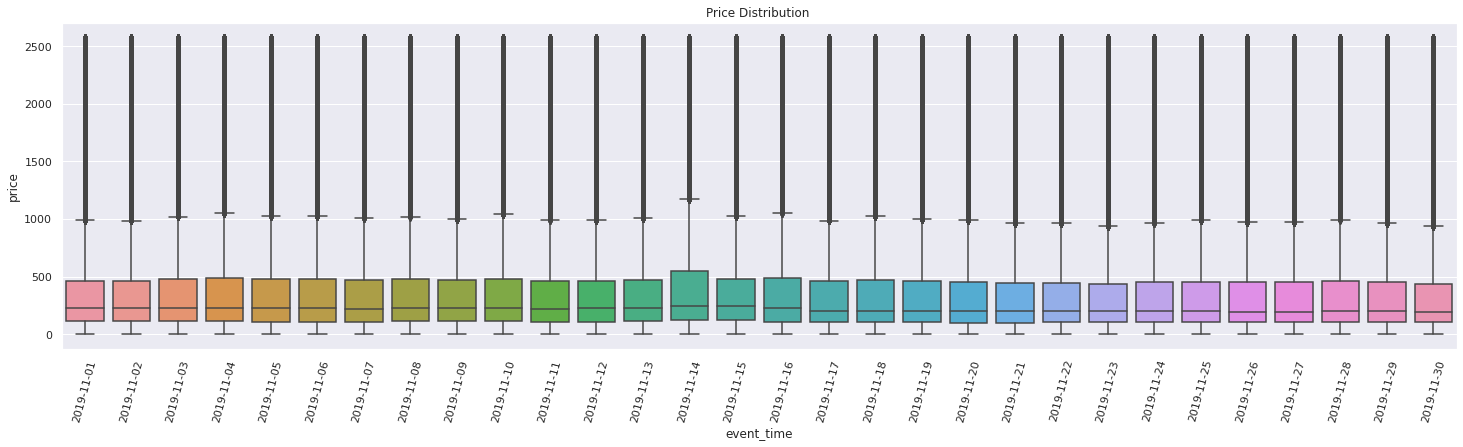

In [ ]:
sns.set(font_scale = 1)
plt.figure(figsize=(25,6))
ax = sns.boxplot(x='event_time', y='price', data=international_ecommerce_df)
ax.set_title('Price Distribution ')
for item in ax.get_xticklabels():
    item.set_rotation(75)

When analyzing the results of the graph of the International Ecommerce Purchases across November, we see from November 13 to November 17 there is a giant spike in ecommerce purchases internationally. We simultaneously see in the graph of the International Ecommerce Average Purchase price across November, the average price purchased across November also follows the trend of number of items purchased, with a momentary spike in purchase price from November 13 to November 15. 

These graphs analyzed together provide rationale into the idea that average purchase price has correlation with total number of purchases across time. Therefore, let us test if such a correlation between average price and number of ecommerce transactions internationally exist by calculating the regression plot and Pearson correlation coefficient (uses method of covariance to find magnitude of correlation between variables) between total number of purchases versus average purchase price across November. 

In [ ]:
# Visualize the correlation matrix between variables

# Join the Number of Transactions with Price based on similar Date time
total_purchase_vs_average_price_df = pd.merge(left=international_ecommerce_time_purchase_df, right=international_ecommerce_time_price_df, left_on='Date', right_on='Date', how='inner')

total_purchase_vs_average_price_df

,Date,Number of Transactions,Price
0,2019-11-01,897686,361.29
1,2019-11-02,960658,357.46
2,2019-11-03,982167,365.96
3,2019-11-04,1101573,374.04
4,2019-11-05,1031735,368.14
5,2019-11-06,1022542,365.95
6,2019-11-07,1080119,358.92
7,2019-11-08,1177376,362.00
8,2019-11-09,1164871,359.53
9,2019-11-10,1204700,364.18


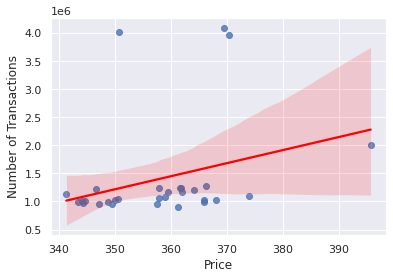

In [ ]:
sns.set(color_codes=True)
ax = sns.regplot(x="Price", y="Number of Transactions", data=total_purchase_vs_average_price_df,line_kws={'color':'red'})

In [ ]:
num_purchase_price_corr = total_purchase_vs_average_price_df.corr(method = 'pearson')
num_purchase_price_corr

,Number of Transactions,Price
Number of Transactions,1.000000,0.299295
Price,0.299295,1.000000


Text(0.5, 1.0, 'Number of Transaction Versus Price (Correlation)')

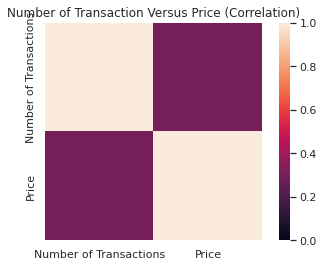

In [ ]:
correlation_mat_price_num_purchase = sns.heatmap(num_purchase_price_corr, square = True, annot = False, vmin = 0)
correlation_mat_price_num_purchase.set_title('Number of Transaction Versus Price (Correlation)')

Thorugh our results of regression plot and pearson-based correlation matrix, we find that there exists some correlation between number of transacitons and average price internationoally for the month of November. We found that the Pearson correlation coefficient equals around .3, which classifies average price and number of transactions as having a Moderate degree of correlation (medium correlation). 

We now draw observations on the most successful brands internationally in terms of ecommerce in November 2019.

In [ ]:
# Top 20 Most Successful Brands Internationally
international_ecommerce_brand_df = international_ecommerce_df.groupby(['brand'])['user_id'].count().reset_index()
international_ecommerce_brand_df = international_ecommerce_brand_df.sort_values(['user_id'], ascending = False)
international_ecommerce_brand_df = international_ecommerce_brand_df.rename(columns = {"user_id": "Number Purchases"})
international_ecommerce_brand_df = international_ecommerce_brand_df.rename(columns = {"brand": "Brands"})
international_ecommerce_brand_df['Brands'] = international_ecommerce_brand_df['Brands'].apply(lambda x: x.capitalize())
international_ecommerce_brand_df = international_ecommerce_brand_df.head(20)

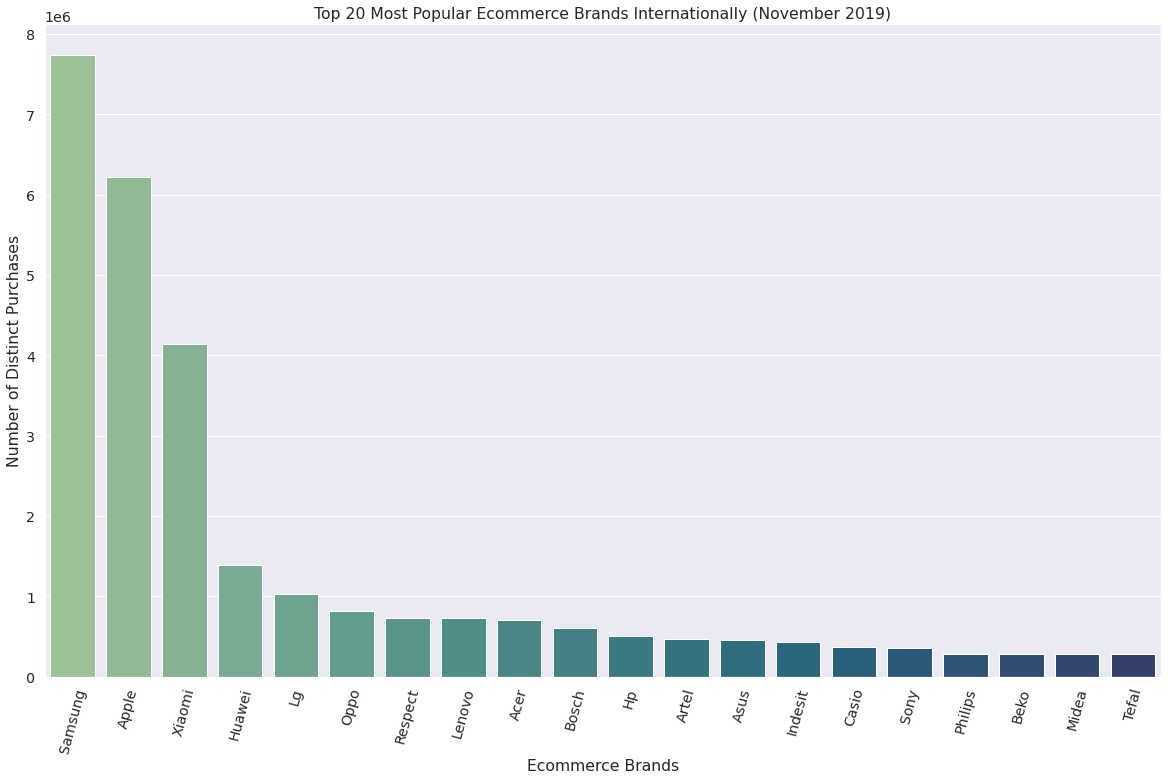

In [ ]:
# Plot top 20 Products' percentages
plt.figure(figsize=(20,12))
sns.set(font_scale = 1.3)
bar = sns.barplot(x="Brands", y="Number Purchases", data=international_ecommerce_brand_df, ci=None, dodge=True, palette = 'crest')
bar.set_title('Top 20 Most Popular Ecommerce Brands Internationally (November 2019)')
bar.set(xlabel='Ecommerce Brands', ylabel='Number of Distinct Purchases')
for item in bar.get_xticklabels():
    item.set_rotation(75)

Through our EDA of this dataset, we have found that the smartphones contribute to over 40% of the ecommerce purchases internationally as of November 2019. Of the 5 most popular ecommerce brands internatinoally, 3 out of 5 of them are smartphone brands. Therefore, we will focus our following analysis on smartphones in order to gague how much correlation there is between smartphone demand and international demand for all products.

In [ ]:
# Find trends in number of smartphone purchases
smartphone_df = international_ecommerce_df[international_ecommerce_df['category_code'] == 'electronics.smartphone']
smartphone_df

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id
0,2019-11-01,view,1003461,2053013555631882655,electronics.smartphone,xiaomi,489.07,520088904
3,2019-11-01,view,1004775,2053013555631882655,electronics.smartphone,xiaomi,183.27,558856683
6,2019-11-01,view,1004258,2053013555631882655,electronics.smartphone,apple,732.07,532647354
8,2019-11-01,view,1004566,2053013555631882655,electronics.smartphone,huawei,164.84,566265908
10,2019-11-01,view,1004708,2053013555631882655,electronics.smartphone,huawei,151.99,566143627
...,...,...,...,...,...,...,...,...
42089543,2019-11-30,view,1003911,2053013555631882655,electronics.smartphone,samsung,177.10,578678977
42089554,2019-11-30,view,1005174,2053013555631882655,electronics.smartphone,samsung,591.75,579969525
42089555,2019-11-30,view,1005118,2053013555631882655,electronics.smartphone,apple,925.47,579969045
42089561,2019-11-30,view,1004833,2053013555631882655,electronics.smartphone,samsung,167.03,557794415


In [ ]:
# Names of the Unique Smartphones in Dataset
print(smartphone_df['brand'].unique())

['xiaomi' 'apple' 'huawei' 'samsung' 'oppo' 'oneplus' 'vivo' 'nokia'
 'meizu' 'honor' 'tp-link' 'zte' 'sony' 'lg' 'bq' 'htc' 'blackberry'
 'vertex' 'google' 'prestigio' 'haier' 'inoi' 'jinga' 'doogee' 'nubia'
 'texet' 'umi' 'fly' 'asus' 'irbis' 'tecno' 'philips' 'gionee' 'oukitel'
 'leeco' 'micromax' 'leagoo' 'hiper' 'ark' 'motorola' 'bravis' 'lenovo']


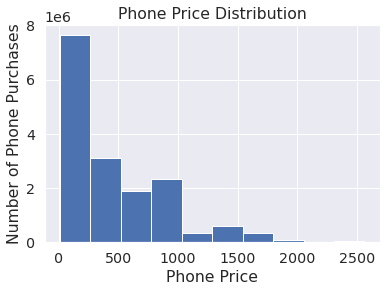

In [ ]:
smartphone_df.hist(column='price')
plt.title('Phone Price Distribution')
plt.xlabel('Phone Price')
plt.ylabel('Number of Phone Purchases')
plt.show()

In [ ]:
phone_df = pd.read_csv('Amazon_Unlocked_Mobile.csv')
phone_df

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0
...,...,...,...,...,...,...
413835,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,5,another great deal great price,0.0
413836,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,3,Ok,0.0
413837,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,5,Passes every drop test onto porcelain tile!,0.0
413838,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,3,I returned it because it did not meet my needs...,0.0


In [ ]:
phone_df.dtypes

Product Name     object
Brand Name       object
Price           float64
Rating            int64
Reviews          object
Review Votes    float64
dtype: object

In [ ]:
def convert_into_range_category(x) :
  if x >= 0 and x < 100:
    return 1;
  if x >= 100 and x < 200:
    return 2;
  if x >= 200 and x < 300:
    return 3;
  if x >= 300 and x < 800:
    return 4;
  return 5;

In [ ]:
phone_df['price range'] = phone_df['Price'].apply(lambda x: convert_into_range_category(x))
phone_df

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,price range
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0,2
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0,2
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0,2
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0,2
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0,2
...,...,...,...,...,...,...,...
413835,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,5,another great deal great price,0.0,1
413836,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,3,Ok,0.0,1
413837,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,5,Passes every drop test onto porcelain tile!,0.0,1
413838,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,3,I returned it because it did not meet my needs...,0.0,1


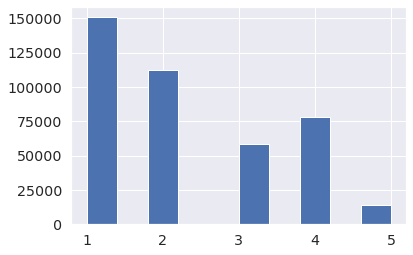

In [ ]:
phone_df['price range'].hist()

In [ ]:
smartphone_df['price range'] = smartphone_df['price'].apply(lambda x: convert_into_range_category(x))
smartphone_df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,price range
0,2019-11-01,view,1003461,2053013555631882655,electronics.smartphone,xiaomi,489.07,520088904,4
3,2019-11-01,view,1004775,2053013555631882655,electronics.smartphone,xiaomi,183.27,558856683,2
6,2019-11-01,view,1004258,2053013555631882655,electronics.smartphone,apple,732.07,532647354,4
8,2019-11-01,view,1004566,2053013555631882655,electronics.smartphone,huawei,164.84,566265908,2
10,2019-11-01,view,1004708,2053013555631882655,electronics.smartphone,huawei,151.99,566143627,2
...,...,...,...,...,...,...,...,...,...
42089543,2019-11-30,view,1003911,2053013555631882655,electronics.smartphone,samsung,177.10,578678977,2
42089554,2019-11-30,view,1005174,2053013555631882655,electronics.smartphone,samsung,591.75,579969525,4
42089555,2019-11-30,view,1005118,2053013555631882655,electronics.smartphone,apple,925.47,579969045,5
42089561,2019-11-30,view,1004833,2053013555631882655,electronics.smartphone,samsung,167.03,557794415,2


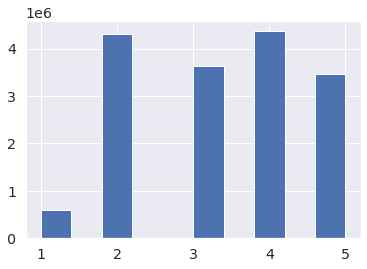

In [ ]:
smartphone_df['price range'].hist()

In [ ]:
print(phone_df['Brand Name'].unique())

['Samsung' 'Nokia' nan 'HTM' 'Jethro' 'e passion'
 'Cedar Tree Technologies' 'Indigi' 'Phone Baby' 'OtterBox' 'Lenovo'
 'Huawei' 'JUNING' 'Elephone' 'Plum' 'VKworld' 'NOKIA' 'Ulefone' 'Jiuhe'
 'inDigi' 'Acer' 'Aeku' 'AKUA' 'Alcatel' 'TCL Mobile' 'LG' 'amar' 'Amazon'
 'Odysseus' 'Digital SNITCH' 'star' 'Android' 'Yezz' 'Yezz Wireless Ltd.'
 'Apple' 'Apple Computer' 'Certified Refurbished'
 'Amazon.com, LLC *** KEEP PORules ACTIVE ***' 'apple' 'ARGOM TECH' 'Asus'
 'ASUS' 'ASUS Computers' 'asus' 'BlackBerry' 'Motorola' 'Palm' 'Pantech'
 'ZTE' 'ATT' 'UnAssigned' 'Atoah'
 'BlackBerry Storm 9530 Smartphone Unlocked GSM Wireless Handheld Device w/Camera Bluetooth 3.25" Touchscreen LCD'
 'WorryFree Gadgets' 'worryfree' 'iDROID USA' 'Blackberry (Rim)'
 'Research In Motion' 'BLACKBERRY' 'Black Berry' 'Blackberry' 'blackberry'
 'RIM' 'Research in Motion' 'Blackberrry' 'Storm' 'Blackview' 'BLU'
 'Various' 'CT-Miami LLC' 'blu' 'BLUBOO' 'Bluboo' 'Iridium' 'AeroAntenna'
 'BlueCosmo' 'GT Star' 'Boost 

## Sentiment Analysis

After identifying that smartphones are the most popularly sold item internationally, we aim hypothesize that there is an overall strong positive sentiment for smartphones, which contributes to the popularity of this segment of product in the international ecommerce space. In order to obtain a better understanding the relationship between customer willingness to pay for a given price point, brand name, public online reviews, and the general satisfaction of the customer's purchase, we perform a brief sentiment analysis on the Amazon reviews of smartphones internationally. 

In [ ]:
!pip install afinn

     |████████████████████████████████| 52 kB 1.1 MB/s 
  Created wheel for afinn: filename=afinn-0.1-py3-none-any.whl size=53448 sha256=34a90a26f11419b4d88f9cdf07e3eda682d039a2d162a55e5b7d6aacf2f17467
  Stored in directory: /root/.cache/pip/wheels/9d/16/3a/9f0953027434eab5dadf3f33ab3298fa95afa8292fcf7aba75
Successfully built afinn


In [ ]:
from afinn import Afinn

In [ ]:
afinn = Afinn(language='en')

In [ ]:
phone_df = phone_df.dropna(subset = ['Reviews'])
phone_df['sentiment_score'] = phone_df['Reviews'].apply(afinn.score)
phone_df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,price range,sentiment_score
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0,2,11.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0,2,19.0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0,2,3.0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0,2,9.0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0,2,-3.0
...,...,...,...,...,...,...,...,...
413835,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,5,another great deal great price,0.0,1,6.0
413836,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,3,Ok,0.0,1,0.0
413837,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,5,Passes every drop test onto porcelain tile!,0.0,1,-1.0
413838,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,3,I returned it because it did not meet my needs...,0.0,1,3.0


In [ ]:
phone_price_brand_group_df1 = phone_df.groupby(['Brand Name', 'price range'])['Review Votes'].mean().to_frame().reset_index()
phone_price_brand_group_df2 = phone_df.groupby(['Brand Name', 'price range'])['sentiment_score'].mean().to_frame().reset_index()
phone_price_brand_group_df = pd.merge(left=phone_price_brand_group_df1, right=phone_price_brand_group_df2, left_on='Brand Name', right_on='Brand Name', how='inner')
phone_price_brand_group_df = phone_price_brand_group_df.drop(columns = 'price range_y')
phone_price_brand_group_df = phone_price_brand_group_df.rename(columns = {"price range_x": "Price Range"})
phone_price_brand_group_df = phone_price_brand_group_df.rename(columns = {"Review Votes": "Average Review Score"})
phone_price_brand_group_df = phone_price_brand_group_df.rename(columns = {"sentiment_score": "Average Sentiment Score"})

phone_price_brand_group_df

,Brand Name,Price Range,Average Review Score,Average Sentiment Score
0,AKUA,5,0.000000,8.000000
1,AMM Global Enterprises,1,0.111111,13.444444
2,ARGOM TECH,2,0.000000,7.500000
3,ASUS,1,1.511111,7.000000
4,ASUS,1,1.511111,4.987179
...,...,...,...,...
1188,verykool,4,2.600000,4.138850
1189,verykool,4,2.600000,5.095890
1190,verykool,4,2.600000,-1.800000
1191,winwinzonece,1,3.000000,3.000000


In [ ]:
phone_price_brand_group_df['Brand Name'] = phone_price_brand_group_df['Brand Name'].apply(lambda x : x.lower())
phone_price_brand_group_df = phone_price_brand_group_df.dropna()
phone_price_brand_group_df

,Brand Name,Price Range,Average Review Score,Average Sentiment Score
0,akua,5,0.000000,8.000000
1,amm global enterprises,1,0.111111,13.444444
2,argom tech,2,0.000000,7.500000
3,asus,1,1.511111,7.000000
4,asus,1,1.511111,4.987179
...,...,...,...,...
1188,verykool,4,2.600000,4.138850
1189,verykool,4,2.600000,5.095890
1190,verykool,4,2.600000,-1.800000
1191,winwinzonece,1,3.000000,3.000000


In [ ]:
phone_price_brand_group_df['Average Review Score'].describe()

count    1193.000000
mean        1.417149
std         1.515399
min         0.000000
25%         0.500000
50%         1.090260
75%         1.714286
max        14.000000
Name: Average Review Score, dtype: float64

In [ ]:
phone_price_brand_group_df['Average Sentiment Score'].describe()

count    1193.000000
mean        4.221869
std         3.846457
min        -5.000000
25%         2.226415
50%         3.571429
75%         5.333333
max        36.000000
Name: Average Sentiment Score, dtype: float64

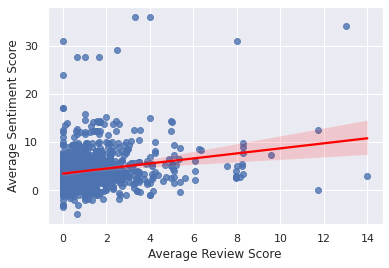

In [ ]:
# Dot plot of average review score against avg sentiment score
sns.set(color_codes=True)
ax = sns.regplot(x="Average Review Score", y="Average Sentiment Score", data=phone_price_brand_group_df,line_kws={'color':'red'})

Text(0.5, 1.0, 'Average Sentiment vs Amazon Review Score (Correlation)')

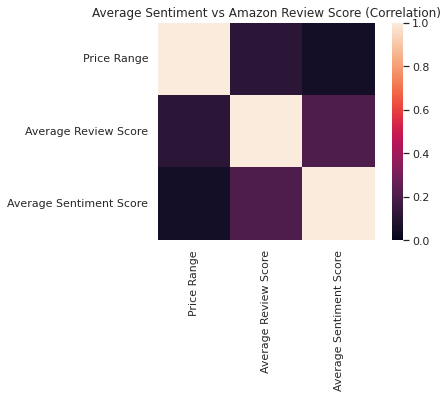

In [ ]:
phone_corr = phone_price_brand_group_df.corr(method='pearson')
correlation_mat_sentiment = sns.heatmap(phone_corr, square = True, annot = False, vmin = 0)
correlation_mat_sentiment.set_title('Average Sentiment vs Amazon Review Score (Correlation)')

From this sentiment analysis, we are able to derive a moderately positive correlation relationship between average sentiment score and average review score, which matches the hypothesis. From the summary statistics, we see that the mean sentiment score is 4.221869, which indicates a strongly positive sentiment for smartphones internationally. Hence, our hypothesis has been supported by the data showing how strong sentiment translates to a higher demand for the product internationally in the ecommerce space.

# **Section 2: 4 country-specific datasets**

## Data cleaning and Wrangling 

Next, we move onto cleaning and wrangling of our datasets.


The following are 5 datasets we use to analyze the e-commerce demand in 5 countries
*   [Pakistan](https://www.kaggle.com/zusmani/pakistans-largest-ecommerce-dataset )
*   [United Kingdom](https://www.kaggle.com/carrie1/ecommerce-data )
*   [United States](https://www.kaggle.com/ammaraahmad/us-ecommerce-record-2020 )
*   [India](https://www.kaggle.com/benroshan/ecommerce-data?select=List+of+Orders.csv )
*   [Brazil](https://www.kaggle.com/olistbr/brazilian-ecommerce?select=product_category_name_translation.csv )

As an overview of the data cleaning, wrangling, and Exploratory Data Analysis for these 5 datasets, we will be analyzing e-commerce trends in each individual country, drawing insights about the similarities and differences beetween the preferences of citizens of different geographical locations. We then union these datasets together to form a comprehensive dataset that we can draw greater insights on. 

For all the datasets, we prepare them for analysis  by:
1. Dropping irrelevant / unuseful columns 
2. Dropping nulls
3. Casting columns to datetime (allows us to make more useful analyses with these columns going forward) 

For the datasets for India and Brazil, cleaning involved a more rigorous proccess, using joins to combine multiple datasets. 

**Pakistan E-Commerce Dataset**

In [ ]:
# Prelimary look at the Pakistan df
pakistan_df.head(5)

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,sales_commission_code,discount_amount,payment_method,Working Date,BI Status,MV,Year,Month,Customer Since,M-Y,FY,Customer ID,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,211131.0,complete,7/1/2016,kreations_YI 06-L,1950.0,1.0,1950.0,100147443,Women's Fashion,\N,0.0,cod,7/1/2016,#REF!,"1,950",2016.0,7.0,2016-7,7-2016,FY17,1.0,NaN,NaN,NaN,NaN,NaN
1,211133.0,canceled,7/1/2016,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...,240.0,1.0,240.0,100147444,Beauty & Grooming,\N,0.0,cod,7/1/2016,Gross,240,2016.0,7.0,2016-7,7-2016,FY17,2.0,NaN,NaN,NaN,NaN,NaN
2,211134.0,canceled,7/1/2016,Ego_UP0017-999-MR0,2450.0,1.0,2450.0,100147445,Women's Fashion,\N,0.0,cod,7/1/2016,Gross,"2,450",2016.0,7.0,2016-7,7-2016,FY17,3.0,NaN,NaN,NaN,NaN,NaN
3,211135.0,complete,7/1/2016,kcc_krone deal,360.0,1.0,60.0,100147446,Beauty & Grooming,R-FSD-52352,300.0,cod,7/1/2016,Net,360,2016.0,7.0,2016-7,7-2016,FY17,4.0,NaN,NaN,NaN,NaN,NaN
4,211136.0,order_refunded,7/1/2016,BK7010400AG,555.0,2.0,1110.0,100147447,Soghaat,\N,0.0,cod,7/1/2016,Valid,"1,110",2016.0,7.0,2016-7,7-2016,FY17,5.0,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Preliminary look into the dimensions of the raw data
pakistan_df.shape

(1048575, 26)

In [ ]:
# Count nulls in the dataset
pakistan_df.isna().sum()

item_id                   464051
status                    464066
created_at                464051
sku                       464071
price                     464051
qty_ordered               464051
grand_total               464051
increment_id              464051
category_name_1           464215
sales_commission_code     601226
discount_amount           464051
payment_method            464051
Working Date              464051
BI Status                 464051
 MV                       464051
Year                      464051
Month                     464051
Customer Since            464062
M-Y                       464051
FY                        464051
Customer ID               464062
Unnamed: 21              1048575
Unnamed: 22              1048575
Unnamed: 23              1048575
Unnamed: 24              1048575
Unnamed: 25              1048575
dtype: int64

A preliminary look into the Pakistan data set reveals a large amount of null values (ex. ~44% for the status column) and a large number of columns, many of which do not sound useful or are extraneous (for example, a column like sales_commission is not relevant to our goals of the project, and the last 5 columns of "Unnamed: #" are all not helpful).  

In [ ]:
# Keeping only useful columns
drop_col = ['increment_id', 'created_at', 'sales_commission_code', 'BI Status', 'Customer Since', 'M-Y', 'FY', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25']
pakistan_df.drop(drop_col, axis = 1, inplace=True)

# Difficulty dropping colummn "MV" due to space error, so manually drop by column index
pakistan_df.drop(pakistan_df.columns[[8]], axis=1, inplace=True)

# Rename columns to better reflect data represented
pakistan_df.rename(columns = {'Working Date' : 'purchase_date'}, inplace=True)

# Drop null values
pakistan_df.dropna(inplace= True)


As stated earlier, we cast all columns (for this dataset and others) related to date to datetime in order to set them up for deeper time analyses moving forward.

In [ ]:
# Casting features to datetime
pakistan_df['purchase_date'] = pd.to_datetime(pakistan_df['purchase_date'])

In [ ]:
# Look at cleaned pakistan df
pakistan_df.head(10)

,item_id,status,sku,price,qty_ordered,grand_total,category_name_1,discount_amount,purchase_date,MV,Year,Month,Customer ID
0,211131.0,complete,kreations_YI 06-L,1950.0,1.0,1950.0,Women's Fashion,0.0,2016-07-01,"1,950",2016.0,7.0,1.0
1,211133.0,canceled,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...,240.0,1.0,240.0,Beauty & Grooming,0.0,2016-07-01,240,2016.0,7.0,2.0
2,211134.0,canceled,Ego_UP0017-999-MR0,2450.0,1.0,2450.0,Women's Fashion,0.0,2016-07-01,"2,450",2016.0,7.0,3.0
3,211135.0,complete,kcc_krone deal,360.0,1.0,60.0,Beauty & Grooming,300.0,2016-07-01,360,2016.0,7.0,4.0
4,211136.0,order_refunded,BK7010400AG,555.0,2.0,1110.0,Soghaat,0.0,2016-07-01,"1,110",2016.0,7.0,5.0
5,211137.0,canceled,UK_Namkino All In One 200 Gms,80.0,1.0,80.0,Soghaat,0.0,2016-07-01,80,2016.0,7.0,6.0
6,211138.0,complete,kcc_krone deal,360.0,1.0,60.0,Beauty & Grooming,300.0,2016-07-01,360,2016.0,7.0,7.0
7,211139.0,complete,UK_Namkino Mix Nimco 400 Gms,170.0,1.0,170.0,Soghaat,0.0,2016-07-01,170,2016.0,7.0,6.0
8,211140.0,canceled,Apple iPhone 6S 64GB,96499.0,1.0,96499.0,Mobiles & Tablets,0.0,2016-07-01,"96,499",2016.0,7.0,8.0
9,211141.0,canceled,Apple iPhone 6S 64GB,96499.0,1.0,96499.0,Mobiles & Tablets,0.0,2016-07-01,"96,499",2016.0,7.0,8.0


In [ ]:
pakistan_df.shape

(584314, 13)

Ultimately, we are left with 584k observations and 13 features, which is a pretty large decrease due to the number of null values which were present in our original dataset. 

Next, we move onto similar processes for our remaining 3 datasets. 

**United States E-Commerce Dataset**

In [ ]:
# Displaying the first 5 rows of the US df
united_states_df.head(5)

,Order Date,Row ID,Order ID,Ship Mode,Customer ID,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,01-01-20,849,CA-2017-107503,Standard Class,GA-14725,Consumer,United States,Lorain,Ohio,44052,East,FUR-FU-10003878,Furniture,Furnishings,"Linden 10"" Round Wall Clock, Black",48.896,4,0.2,8.5568
1,01-01-20,4010,CA-2017-144463,Standard Class,SC-20725,Consumer,United States,Los Angeles,California,90036,West,FUR-FU-10001215,Furniture,Furnishings,"Howard Miller 11-1/2"" Diameter Brentwood Wall ...",474.430,11,0.0,199.2606
2,01-01-20,6683,CA-2017-154466,First Class,DP-13390,Home Office,United States,Franklin,Wisconsin,53132,Central,OFF-BI-10002012,Office Supplies,Binders,Wilson Jones Easy Flow II Sheet Lifters,3.600,2,0.0,1.7280
3,01-01-20,8070,CA-2017-151750,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,77340,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,454.560,5,0.2,-107.9580
4,01-01-20,8071,CA-2017-151750,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,77340,Central,FUR-FU-10002116,Furniture,Furnishings,"Tenex Carpeted, Granite-Look or Clear Contempo...",141.420,5,0.6,-187.3815


In [ ]:
# Count nulls in the dataset
united_states_df.isna().sum()

Order Date      0
Row ID          0
Order ID        0
Ship Mode       0
Customer ID     0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Product ID      0
Category        0
Sub-Category    0
Product Name    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [ ]:
united_states_df.shape

(3312, 19)

Looking at this dataset, there are a large number of columns, especially in relation to location (which our previous dataset did not look at) which provides us opportunity to conduct geographical analyses later on. 

We clean this data similarly as we have done, keeping in mind that there are no null values in this data.

In [ ]:
# Drop nulls, duplicates, and unuseful columns
united_states_df.drop_duplicates(inplace = True)
drop_col = ['Row ID', 'Order ID', 'Product Name']
united_states_df.drop(drop_col, axis = 1, inplace=True)

# Rename column to match with previous naming conventions
united_states_df.rename(columns = {'Order Date' : 'purchase_date'}, inplace=True)

One feature we looked more closely into was Segment since our other 3 datasets focus solely on the consumer segment. 

In [ ]:
united_states_df['Segment'].value_counts()

Consumer       1668
Corporate       980
Home Office     664
Name: Segment, dtype: int64

Although we see there being corporate and home office purchases, due to a limited amount of data offered by this dataset, we keep these categories in and proceed with our analysis, keeping in mind this expanded focus.

With this dataset, there is no feature called "price". Instead, since we have sales and quantity we are able to calculate a price column. 

In [ ]:
united_states_df['price'] = united_states_df['Sales'] / united_states_df['Quantity']

Once again, we cast the purchase_date to be a date time object for future analysis.

In [ ]:
united_states_df['purchase_date'] = pd.to_datetime(united_states_df['purchase_date'])

In [ ]:
united_states_df.head(10)

,purchase_date,Ship Mode,Customer ID,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Sales,Quantity,Discount,Profit,price
0,2020-01-01,Standard Class,GA-14725,Consumer,United States,Lorain,Ohio,44052,East,FUR-FU-10003878,Furniture,Furnishings,48.896,4,0.2,8.5568,12.224
1,2020-01-01,Standard Class,SC-20725,Consumer,United States,Los Angeles,California,90036,West,FUR-FU-10001215,Furniture,Furnishings,474.430,11,0.0,199.2606,43.130
2,2020-01-01,First Class,DP-13390,Home Office,United States,Franklin,Wisconsin,53132,Central,OFF-BI-10002012,Office Supplies,Binders,3.600,2,0.0,1.7280,1.800
3,2020-01-01,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,77340,Central,OFF-ST-10002743,Office Supplies,Storage,454.560,5,0.2,-107.9580,90.912
4,2020-01-01,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,77340,Central,FUR-FU-10002116,Furniture,Furnishings,141.420,5,0.6,-187.3815,28.284
5,2020-01-01,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,77340,Central,FUR-CH-10003199,Furniture,Chairs,310.744,4,0.3,-26.6352,77.686
6,2020-01-01,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,77340,Central,OFF-AR-10003158,Office Supplies,Art,12.736,4,0.2,2.2288,3.184
7,2020-01-01,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,77340,Central,OFF-BI-10000301,Office Supplies,Binders,6.470,5,0.8,-9.7050,1.294
8,2020-01-01,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,77340,Central,OFF-BI-10000343,Office Supplies,Binders,13.748,14,0.8,-22.6842,0.982
9,2020-01-01,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,77340,Central,OFF-AP-10004708,Office Supplies,Appliances,15.224,2,0.8,-38.8212,7.612


In [ ]:
united_states_df.shape

(3312, 17)

In [ ]:
united_states_df.dtypes

purchase_date    datetime64[ns]
Ship Mode                object
Customer ID              object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code               int64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
price                   float64
dtype: object

At the conclusion of the cleaning of this United States dataset, we have a lot less data than for Pakistan, but have more data about geographic features of purchase behaviors.

**India E-Commerce Dataset**

The data for India's e-commerce purchases was provided in two dataframes: india_order_list_df and india_order_details_df. These two were merged on their shared colummn of 'Order ID'. 

In [ ]:
# Clean and join india datasets
india_df = pd.merge(left = india_order_list_df, right = india_order_details_df, left_on = 'Order ID', right_on = 'Order ID', how = 'inner')
india_df = india_df.drop_duplicates()
india_df.rename(columns = {'Order Date' : 'purchase_date'}, inplace=True)

In [ ]:
# Preliminary look at India df
india_df.head(10)

,Order ID,purchase_date,CustomerName,State,City,Amount,Profit,Quantity,Category,Sub-Category
0,B-25601,01-04-2018,Bharat,Gujarat,Ahmedabad,1275.0,-1148.0,7,Furniture,Bookcases
1,B-25601,01-04-2018,Bharat,Gujarat,Ahmedabad,66.0,-12.0,5,Clothing,Stole
2,B-25601,01-04-2018,Bharat,Gujarat,Ahmedabad,8.0,-2.0,3,Clothing,Hankerchief
3,B-25601,01-04-2018,Bharat,Gujarat,Ahmedabad,80.0,-56.0,4,Electronics,Electronic Games
4,B-25602,01-04-2018,Pearl,Maharashtra,Pune,168.0,-111.0,2,Electronics,Phones
5,B-25602,01-04-2018,Pearl,Maharashtra,Pune,424.0,-272.0,5,Electronics,Phones
6,B-25602,01-04-2018,Pearl,Maharashtra,Pune,2617.0,1151.0,4,Electronics,Phones
7,B-25602,01-04-2018,Pearl,Maharashtra,Pune,561.0,212.0,3,Clothing,Saree
8,B-25602,01-04-2018,Pearl,Maharashtra,Pune,119.0,-5.0,8,Clothing,Saree
9,B-25603,03-04-2018,Jahan,Madhya Pradesh,Bhopal,1355.0,-60.0,5,Clothing,Trousers


In [ ]:
india_df.shape

(1500, 10)

This dataframe has the least number of observations and features we have seen so far. All the columns are relevant here, so none are dropped in our cleaning. Since there is no price column again, we do the same calculation of amount / quantity as performed earlier. We proceed with datetime casting then move onto the next dataframe.

In [ ]:
# Creating a price column
india_df['price'] = india_df['Amount'] / india_df['Quantity']

# Convert to date time
india_df['purchase_date'] = pd.to_datetime(india_df['purchase_date']).dt.date

In [ ]:
# Count nulls in the dataset
india_df.isna().sum()

Order ID         0
purchase_date    0
CustomerName     0
State            0
City             0
Amount           0
Profit           0
Quantity         0
Category         0
Sub-Category     0
price            0
dtype: int64

In [ ]:
# Cleaned india df
india_df.head(10)

,Order ID,purchase_date,CustomerName,State,City,Amount,Profit,Quantity,Category,Sub-Category,price
0,B-25601,2018-01-04,Bharat,Gujarat,Ahmedabad,1275.0,-1148.0,7,Furniture,Bookcases,182.142857
1,B-25601,2018-01-04,Bharat,Gujarat,Ahmedabad,66.0,-12.0,5,Clothing,Stole,13.200000
2,B-25601,2018-01-04,Bharat,Gujarat,Ahmedabad,8.0,-2.0,3,Clothing,Hankerchief,2.666667
3,B-25601,2018-01-04,Bharat,Gujarat,Ahmedabad,80.0,-56.0,4,Electronics,Electronic Games,20.000000
4,B-25602,2018-01-04,Pearl,Maharashtra,Pune,168.0,-111.0,2,Electronics,Phones,84.000000
5,B-25602,2018-01-04,Pearl,Maharashtra,Pune,424.0,-272.0,5,Electronics,Phones,84.800000
6,B-25602,2018-01-04,Pearl,Maharashtra,Pune,2617.0,1151.0,4,Electronics,Phones,654.250000
7,B-25602,2018-01-04,Pearl,Maharashtra,Pune,561.0,212.0,3,Clothing,Saree,187.000000
8,B-25602,2018-01-04,Pearl,Maharashtra,Pune,119.0,-5.0,8,Clothing,Saree,14.875000
9,B-25603,2018-03-04,Jahan,Madhya Pradesh,Bhopal,1355.0,-60.0,5,Clothing,Trousers,271.000000


**Brazil E-Commerce Dataset**

Data for Brazil's e-commerce purchases was provided in multiple datasets. For each of the datasets, we drop nulls and duplicates, drop unuseful columns, then we joined the 5 datasets on common features:
1. brazil_orders_dataset joined with brazil_order_customer_dataset on customer_id
2. brazil_orders_dataset joined with brazil_order_reviews_dataset on order_id
3. brazil_orders_dataset joined with brazil_order_payments_dataset on order_id
4. brazil_orders_dataset joined with brazil_order_items_dataset on order_id
5. brazil_order_items_dataset joined with brazil_products_dataset on product_id

In [ ]:
# brazil_customer_df
brazil_customer_df = brazil_customer_df.dropna(subset = ['customer_id', 'customer_unique_id', 'customer_city'])
brazil_customer_df = brazil_customer_df.drop_duplicates()
brazil_customer_df = brazil_customer_df.drop(columns=['customer_zip_code_prefix'])

# brazil_order_items_df
brazil_order_items_df = brazil_order_items_df.dropna(subset = ['order_id', 'product_id', 'price'])
brazil_order_items_df = brazil_order_items_df.drop(columns=['order_item_id', 'seller_id', 'shipping_limit_date', 'freight_value'])

# brazil_order_reviews_df; broken into 2 separate datasets (review comments) and (review score)
# brazil_order_reviews_comments_df is kept for sentiment analysis
brazil_order_reviews_comments_df = brazil_order_reviews_df.dropna(subset = ['review_id', 'order_id', 'review_comment_message'])
brazil_order_reviews_comments_df = brazil_order_reviews_comments_df.drop(columns = ['review_comment_title', 'review_creation_date', 'review_answer_timestamp'])
# brazil_order_reviews_scores_df is the one we are joining join on
brazil_order_reviews_scores_df = brazil_order_reviews_df.dropna(subset = ['review_id', 'order_id', 'review_score'])
brazil_order_reviews_scores_df = brazil_order_reviews_scores_df.drop(columns = ['review_comment_title', 'review_creation_date', 'review_answer_timestamp', 'review_comment_message'])

# brazil_orders_dataset_df
brazil_orders_dataset_df = brazil_orders_dataset_df.dropna(subset=['order_id', 'customer_id'])
brazil_orders_dataset_df = brazil_orders_dataset_df.drop(columns=['order_status', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date'])

# brazil_products_dataset_df
brazil_products_dataset_df = brazil_products_dataset_df.dropna(subset=['product_id', 'product_category_name'])
brazil_products_dataset_df = brazil_products_dataset_df.drop(columns = ['product_name_lenght', 'product_description_lenght', 'product_photos_qty', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm'])

In [ ]:
# Merge Brazil Datasets
brazil_merge1 = pd.merge(left = brazil_customer_df, right = brazil_orders_dataset_df, left_on = 'customer_id', right_on = 'customer_id', how = 'inner')
brazil_merge2 = pd.merge(left = brazil_merge1, right = brazil_order_reviews_scores_df, left_on = 'order_id', right_on = 'order_id', how = 'inner')
brazil_merge3 = pd.merge(left = brazil_merge2, right = brazil_order_items_df, left_on = 'order_id', right_on = 'order_id', how = 'inner')
brazil_merge4 = pd.merge(left = brazil_merge3, right = brazil_products_dataset_df, left_on = 'product_id', right_on = 'product_id', how = 'inner')
brazil_df = pd.merge(left = brazil_merge4, right = brazil_products_translation_df, left_on = 'product_category_name', right_on = 'product_category_name', how = 'inner')

In [ ]:
# Count nulls in the dataset
brazil_df.isna().sum()

customer_id                      0
customer_unique_id               0
customer_city                    0
customer_state                   0
order_id                         0
order_purchase_timestamp         0
review_id                        0
review_score                     0
product_id                       0
price                            0
product_category_name            0
product_category_name_english    0
dtype: int64

In [ ]:
# Dropping unnecessary columns after the merges
brazil_df = brazil_df.drop(columns=['order_id','product_id', 'product_category_name'])

In [ ]:
brazil_df.shape

(110750, 9)

In [ ]:
# For Brazil's ecommerce review sentiment analysis
brazil_order_reviews_comments_df = brazil_order_reviews_comments_df.drop(columns=['order_id'])
brazil_order_reviews_comments_df.head(3)

,review_id,review_score,review_comment_message
3,e64fb393e7b32834bb789ff8bb30750e,5,Recebi bem antes do prazo estipulado.
4,f7c4243c7fe1938f181bec41a392bdeb,5,Parabéns lojas lannister adorei comprar pela I...
9,8670d52e15e00043ae7de4c01cc2fe06,4,aparelho eficiente. no site a marca do aparelh...


For the states in Brazil, we import a [csv file](https://github.com/datasets-br/state-codes/blob/master/data/br-state-codes.csv) that translates customer_state abbreviations to full city names. We merge this dataset with our original Brazil dataset and drop the column containing the abbreviations. 

In [ ]:
brazil_state_translation_df = pd.read_csv('https://raw.githubusercontent.com/datasets-br/state-codes/master/data/br-state-codes.csv')
brazil_state_translation_df = brazil_state_translation_df.filter(['subdivision', 'name'])
brazil_df = pd.merge(left = brazil_df, right = brazil_state_translation_df, left_on = 'customer_state', right_on = 'subdivision', how = 'inner')
brazil_df = brazil_df.drop(columns=['subdivision'])


Once again, we rename the columns to be consistent with previous datasets, and check the dataypes of columns. 

In [ ]:
brazil_df = brazil_df.rename(columns={"order_purchase_timestamp": "purchase_date"})
brazil_df = brazil_df.rename(columns={"name": "customer_state_name"})
brazil_df = brazil_df.rename(columns={"product_category_name_english": "product_category"})
brazil_df.dtypes

customer_id             object
customer_unique_id      object
customer_city           object
customer_state          object
purchase_date           object
review_id               object
review_score             int64
price                  float64
product_category        object
customer_state_name     object
dtype: object

We continue with casting purchase_date to be a datetime object and then take a look at our resulting, cleaned Brazil dataset.

In [ ]:
brazil_df['purchase_date'] = pd.to_datetime(brazil_df['purchase_date']).dt.date
brazil_df.head(10)

,customer_id,customer_unique_id,customer_city,customer_state,purchase_date,review_id,review_score,price,product_category,customer_state_name
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,franca,SP,2017-05-16,88b8b52d46df026a9d1ad2136a59b30b,4,124.99,office_furniture,São Paulo
1,8bf4f9552bc2db14d6195bbbb5131941,b428f59c73c1bbeb3584744b4570654b,sao paulo,SP,2017-06-24,dfe9b87eb34f2b54b85660e934b902a5,2,124.99,office_furniture,São Paulo
2,9202f01b2ebd095e340abd57e02b65e6,7fcf7dc77013a88b9eef97c288b3eb8d,praia grande,SP,2017-06-02,26b9eacfc049f843e99d3c87eaf380de,4,124.99,office_furniture,São Paulo
3,15359860c7341b2f6b12259d83c2e697,52d8a619dff23c2985434b25e9862ff8,botucatu,SP,2017-04-24,021e3fe507d74d579c4fc4f6f7bd05c1,4,124.99,office_furniture,São Paulo
4,645d4fd3f4546d7c9592576665711186,661ada8f1f0f348790c6b9ce57d51f55,marilia,SP,2018-04-03,fbb7c08e8ca00f3412c095449c59d83b,3,116.99,office_furniture,São Paulo
5,b9c05cfc28f1dd72313d61b139faab45,46587168f28103639ae8249f19b53043,campinas,SP,2017-05-21,b33c9dafa1c7828cde1ff508ca5a3a6b,5,124.99,office_furniture,São Paulo
6,44e25679aa4d5d2ef5103f6b0174a586,613259d64ba972e49dc25b019b7918c3,barueri,SP,2017-12-07,e934b832e3bd9951f2a163ea80cfe20d,4,112.99,office_furniture,São Paulo
7,90714b0e62fe1fbd304fb45fd644ebdd,c666e59a2d3ced923880461526113d38,sao paulo,SP,2018-02-24,84d15544e1fd5221b812cda0d23ae242,1,116.99,office_furniture,São Paulo
8,a2a34d52a5ca3c214067d8d87f6ddf21,ca9522ba7a7c70fc06b2a82471681ce4,poa,SP,2017-07-26,f5eb643a65f9bbfaa614a8a03444d70d,4,119.99,office_furniture,São Paulo
9,a2a34d52a5ca3c214067d8d87f6ddf21,ca9522ba7a7c70fc06b2a82471681ce4,poa,SP,2017-07-26,f5eb643a65f9bbfaa614a8a03444d70d,4,119.99,office_furniture,São Paulo


Once again, getting a sense of the range of the date and time of the Brazil e-commerce data.

In [ ]:
brazil_least_recent_date = brazil_df['purchase_date'].min()
brazil_most_recent_date = brazil_df['purchase_date'].max()

In [ ]:
brazil_least_recent_date

datetime.date(2016, 9, 4)

In [ ]:
brazil_most_recent_date

datetime.date(2018, 9, 3)

We have therefore found that the data for the Brazil E-commerce dataset range from September 2016 to September 2018.

## Exploratory Data Analysis (EDA)




We now move into conducting EDA into our datasets to better visualize them. 

### **Pakistan Data**


In [ ]:
# Top 10 categories in Pakistan for e-commerce purchases by quantity of purchases
pakistan_purchases = pakistan_df[['category_name_1', 'qty_ordered']].groupby(['category_name_1'])['qty_ordered'].sum().reset_index()
pakistan_purchases = pakistan_purchases.rename(columns={'category_name_1': 'Product category name'})
pakistan_purchases = pakistan_purchases.rename(columns={'qty_ordered': 'Number of purchases'})

pakistan_purchases = pakistan_purchases.sort_values(by=['Number of purchases', 'Product category name'], ascending = False)
pakistan_purchases_top_10 = pakistan_purchases.head(10)
pakistan_purchases_top_10

# Top 10 categories in Pakistan by avg price of purchases
pakistan_purchases_price = pakistan_df[['price', 'category_name_1']].groupby(['category_name_1'])['price'].mean().reset_index()
pakistan_purchases_price = pakistan_purchases_price.rename(columns={'category_name_1': 'Product category name'})
pakistan_purchases_price = pakistan_purchases_price.rename(columns={'price': 'Avg price of purchases'})

pakistan_purchases_price = pakistan_purchases_price.sort_values(by=['Avg price of purchases'], ascending = False)
pakistan_purchases_prices_top_10 = pakistan_purchases_price.head(10)
pakistan_purchases_prices_top_10

pakistan_purchase_price_top_3 = pakistan_purchases_price.head(3)


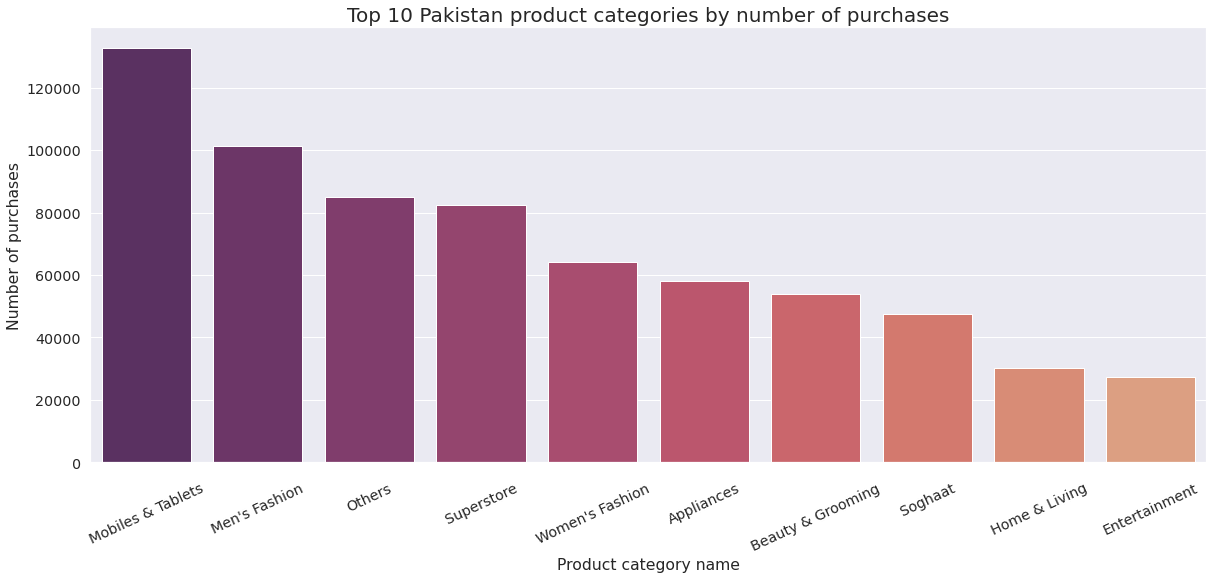

In [ ]:
# Plotting top 10 categories and their number of purchases
plt.figure(figsize=(20,8))
sns.set(font_scale = 1.3)
bar = sns.barplot(x="Product category name", y="Number of purchases", data=pakistan_purchases_top_10, ci=None, dodge=True, palette = 'flare_r')
bar.set_title('Top 10 Pakistan product categories by number of purchases', fontsize = 20)
bar.tick_params(axis='x', rotation=25, size=15)

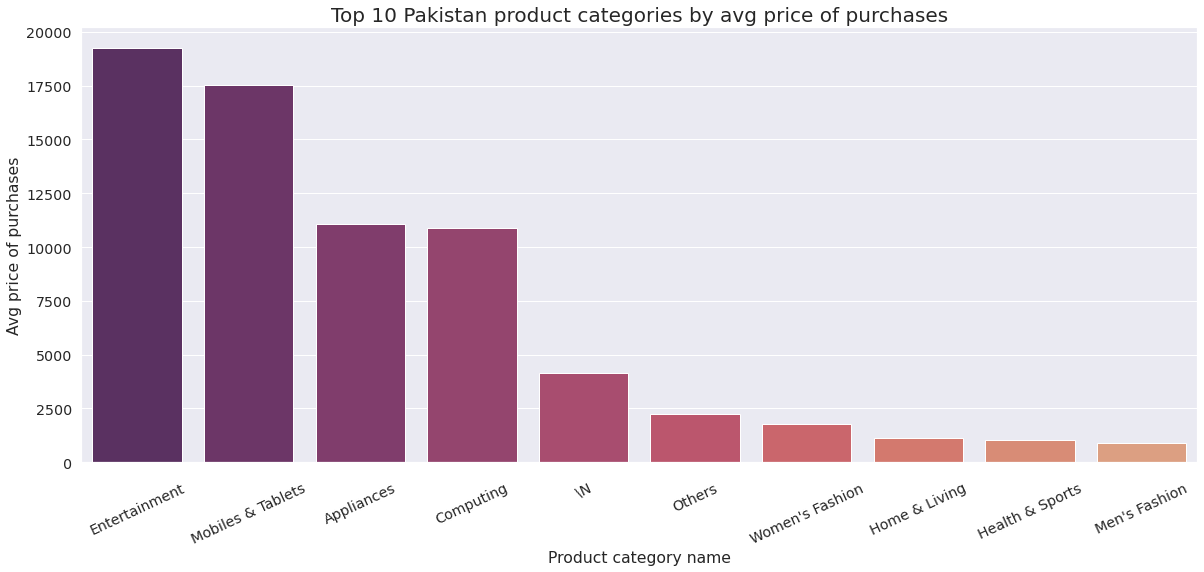

In [ ]:
# Plotting top 10 categories and their average price
plt.figure(figsize=(20,8))
sns.set(font_scale = 1.3)
bar_price = sns.barplot(x="Product category name", y="Avg price of purchases", data=pakistan_purchases_prices_top_10, ci=None, dodge=True, palette = 'flare_r')
bar_price.set_title('Top 10 Pakistan product categories by avg price of purchases', fontsize = 20)
bar_price.tick_params(axis='x', rotation=25, size=15)

In [ ]:
# # Plotting top 10 categories and their price
# plt.figure(figsize=(20,8))
# sns.set(font_scale = 1.3)
# price_box_pakistan = sns.boxplot(x="category_name_1", y="price", data=pakistan_df, palette = 'flare_r')
# price_box_pakistan.set_title('Top 10 Pakistan product categories by avg price of purchases', fontsize = 20)
# price_box_pakistan.tick_params(axis='x', rotation=25, size=15)

We see that purchase date is a common feature among all of these country-specific datasets, so we use this variable to visualize the quantity of purchases across time. 

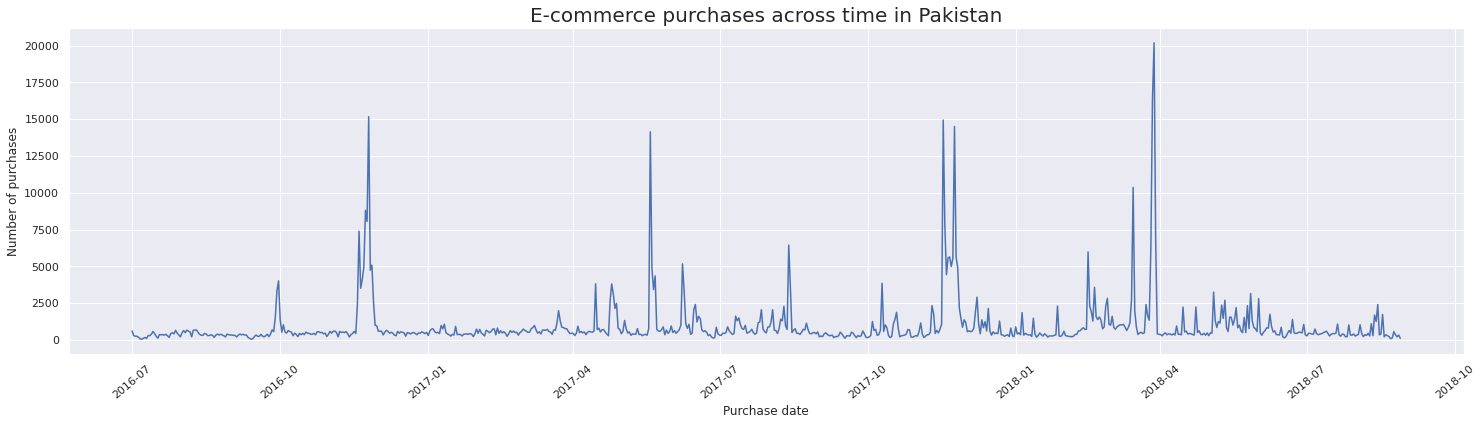

In [ ]:
# Plotting number of purchases by date 
pakistan_purchases_time = pakistan_df[['purchase_date', 'qty_ordered']].groupby(['purchase_date'])['qty_ordered'].sum().reset_index()
pakistan_purchases_time = pakistan_purchases_time.rename(columns={'purchase_date': 'Purchase date'})
pakistan_purchases_time = pakistan_purchases_time.rename(columns={'qty_ordered': 'Number of purchases'})
pakistan_purchases_time = pakistan_purchases_time.sort_values(by=['Purchase date'], ascending = True)
sns.set(font_scale = 1)
plt.figure(figsize=(25,6))
line_plot = sns.lineplot(x='Purchase date', y='Number of purchases', data=pakistan_purchases_time, ci=None, palette = 'flare_r')
line_plot.set_title('E-commerce purchases across time in Pakistan', fontsize=20)
for item in line_plot.get_xticklabels():
    item.set_rotation(40)


From these graphs of the Pakistan data, we see are able to visualize the most popular categories of purchases and the distribution of the number of purchases over time. We see from the time chart certain spikes in purchases around the holiday season (Nov / Dec) which aligns with international purchasing spikes.

### **US Data**

For the US dataset, we have more features to use in our visualizations. We start off similarly as before looking at the average quantity of purchases by category. 

In [ ]:
# Top 10 categories in US for e-commerce purchases by quantity of purchases
us_quant_purchases = united_states_df[['Sub-Category', 'Quantity']].groupby(['Sub-Category'])['Quantity'].sum().reset_index()
us_quant_purchases = us_quant_purchases.rename(columns={'Sub-Category': 'Product category name'})
us_quant_purchases = us_quant_purchases.rename(columns={'Quantity': 'Number of purchases'})

us_quant_purchases = us_quant_purchases.sort_values(by=['Number of purchases', 'Product category name'], ascending = False)
us_quant_purchases_top_10 = us_quant_purchases.head(10)
us_quant_purchases_top_10

# Top 10 categories in US for e-commerce purchases by average price of purchases
us_quant_purchases_price = united_states_df[['price', 'Sub-Category']].groupby(['Sub-Category'])['price'].mean().reset_index()
us_quant_purchases_price = us_quant_purchases_price.rename(columns={'Sub-Category': 'Product category name'})
us_quant_purchases_price = us_quant_purchases_price.rename(columns={'price': 'Avg price of purchases'})

us_quant_purchases_price = us_quant_purchases_price.sort_values(by=['Avg price of purchases'], ascending = False)
us_quant_purchases_price_top_10 = us_quant_purchases_price.head(10)
us_quant_purchases_price_top_10

us_quant_purchases_price_top_3 = us_quant_purchases_price.head(3)

# Segment vs average price of purchase
us_segment_purchase_price = united_states_df[['price', 'Segment']].groupby(['Segment'])['price'].mean().reset_index()
us_segment_purchase_price = us_segment_purchase_price.rename(columns={'price': 'Avg price of purchases'})

us_segment_purchase_price = us_segment_purchase_price.sort_values(by=['Avg price of purchases'], ascending = False)
us_segment_purchase_price_top_10 = us_segment_purchase_price.head(10)
us_segment_purchase_price_top_10

# State vs average price of purchase
us_state_price = united_states_df[['price', 'State']].groupby(['State'])['price'].mean().reset_index()
us_state_price = us_state_price.rename(columns={'price': 'Avg price of purchases'})
us_state_price.sort_values(by=['Avg price of purchases'], ascending = False, inplace=True)

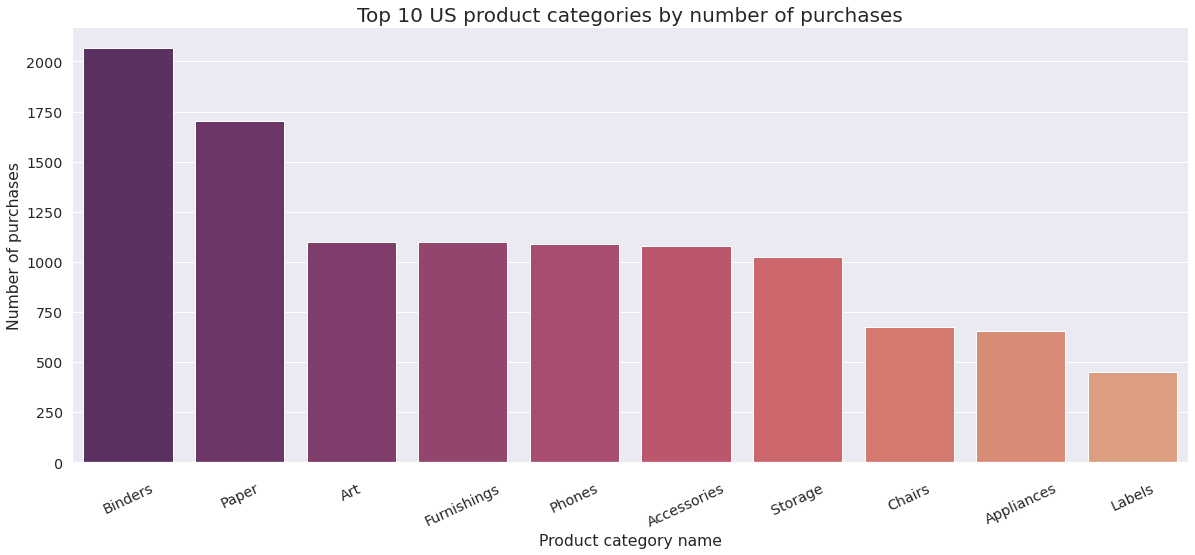

In [ ]:
# Plotting top 10 categories and their number of purchases
plt.figure(figsize=(20,8))
sns.set(font_scale = 1.3)
bar = sns.barplot(x="Product category name", y="Number of purchases", data=us_quant_purchases_top_10, ci=None, dodge=True, palette = 'flare_r')
bar.set_title('Top 10 US product categories by number of purchases', fontsize = 20)
bar.tick_params(axis='x', rotation=25, size=15)

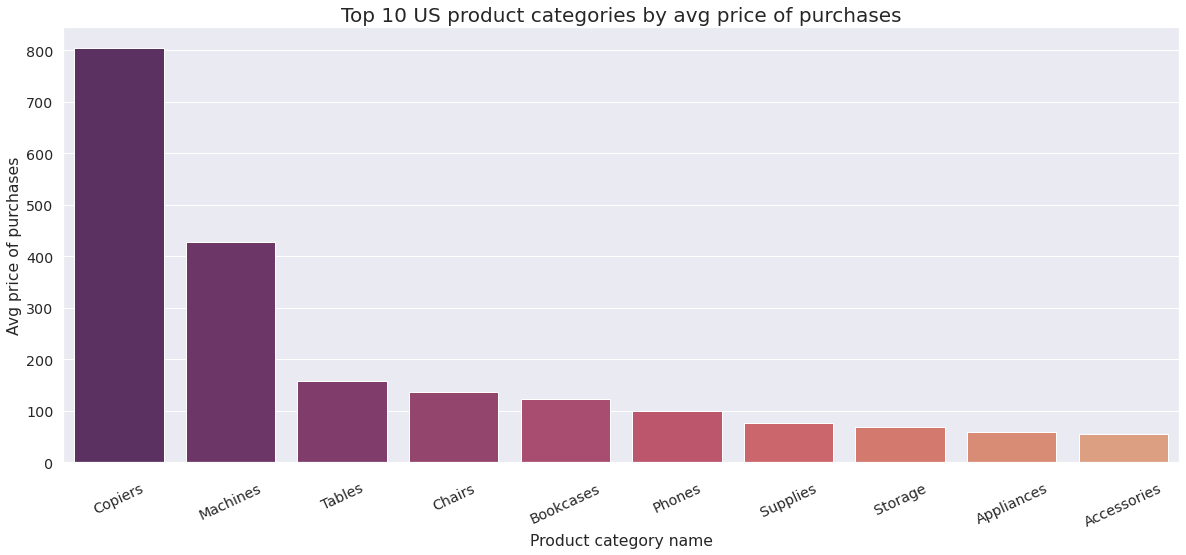

In [ ]:
# Plotting top 10 categories and their average price
plt.figure(figsize=(20,8))
sns.set(font_scale = 1.3)
bar_price = sns.barplot(x="Product category name", y="Avg price of purchases", data=us_quant_purchases_price_top_10, ci=None, dodge=True, palette = 'flare_r')
bar_price.set_title('Top 10 US product categories by avg price of purchases', fontsize = 20)
bar_price.tick_params(axis='x', rotation=25, size=15)

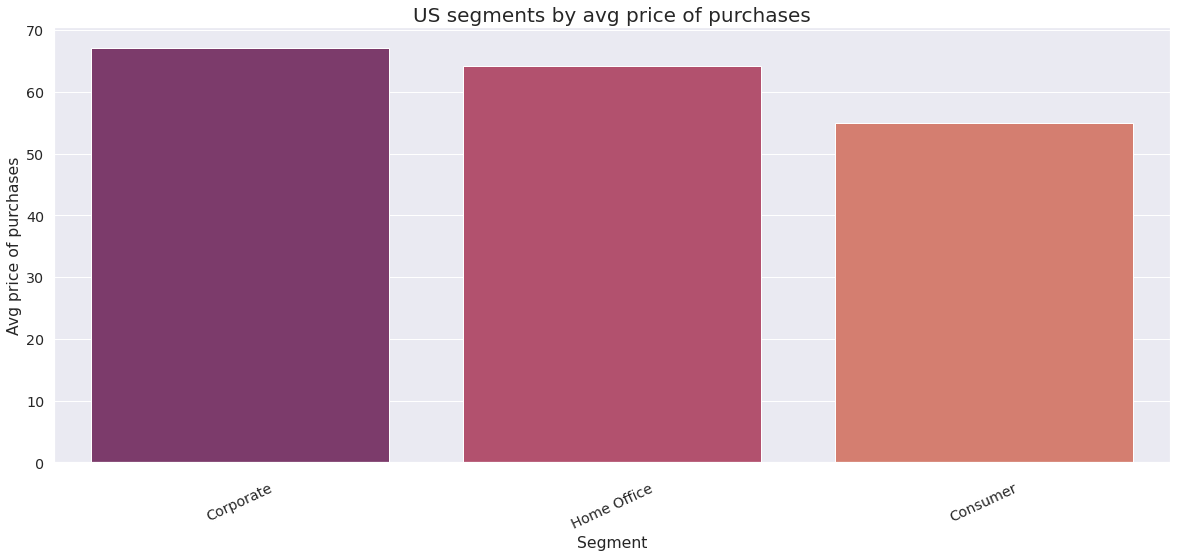

In [ ]:
# Plotting segment vs average purchase price for US e-commerce
plt.figure(figsize=(20,8))
sns.set(font_scale = 1.3)
bar_price = sns.barplot(x="Segment", y="Avg price of purchases", data=us_segment_purchase_price_top_10, ci=None, dodge=True, palette = 'flare_r')
bar_price.set_title('US segments by avg price of purchases', fontsize = 20)
bar_price.tick_params(axis='x', rotation=25, size=15)

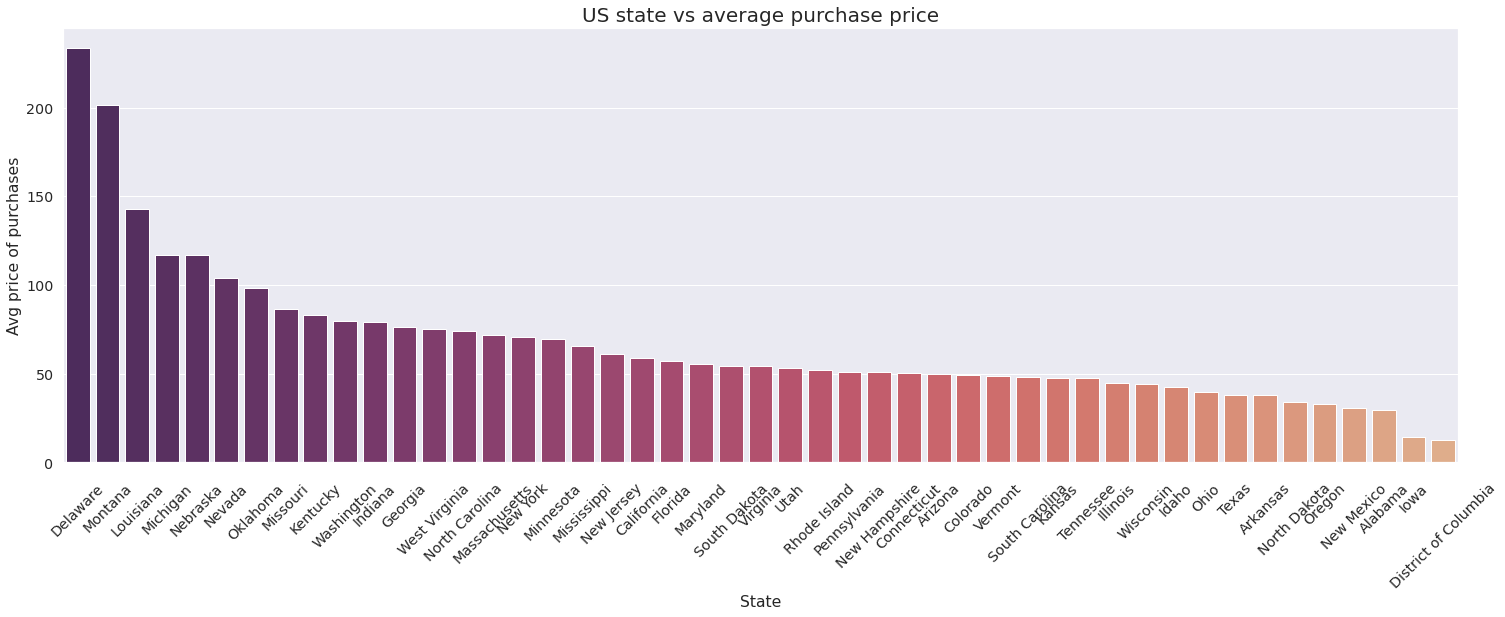

In [ ]:
# Plotting state vs average purchase price in US
plt.figure(figsize=(25,8))
sns.set(font_scale = 1.3)
bar_price = sns.barplot(x="State", y="Avg price of purchases", data=us_state_price, ci=None, dodge=True, palette = 'flare_r')
bar_price.set_title('US state vs average purchase price', fontsize = 20)
bar_price.tick_params(axis='x', rotation=45, size=15)

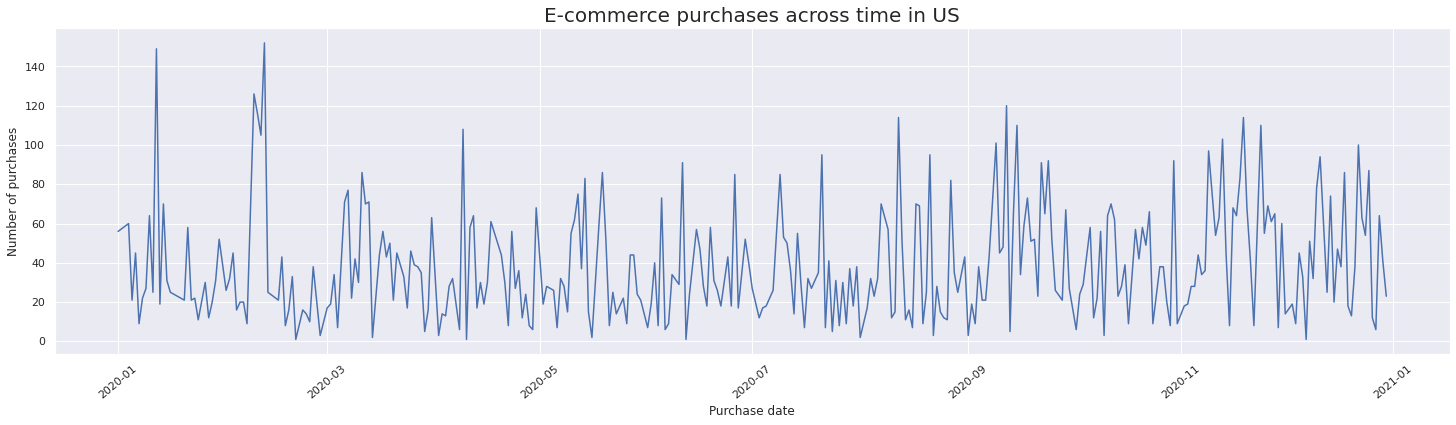

In [ ]:
# Plotting number of purchases by date 
us_purchases_time = united_states_df[['purchase_date', 'Quantity']].groupby(['purchase_date'])['Quantity'].sum().reset_index()
us_purchases_time = us_purchases_time.rename(columns={'purchase_date': 'Purchase date'})
us_purchases_time = us_purchases_time.rename(columns={'Quantity': 'Number of purchases'})
us_purchases_time = us_purchases_time.sort_values(by=['Purchase date'], ascending = True)
sns.set(font_scale = 1)
plt.figure(figsize=(25,6))
line_plot = sns.lineplot(x='Purchase date', y='Number of purchases', data=us_purchases_time, ci=None, palette = 'flare_r')
line_plot.set_title('E-commerce purchases across time in US', fontsize=20)
for item in line_plot.get_xticklabels():
    item.set_rotation(40)

### **India Data**

Once again, we look at similar visualizations for our India dataframe: Category vs number of purchases, category vs average price, price vs City, and purchases over time. 

In [ ]:
# Top 10 categories in India for e-commerce purchases by quantity of purchases
india_quant = india_df[['Sub-Category', 'Quantity']].groupby(['Sub-Category'])['Quantity'].sum().reset_index()
india_quant = india_quant.rename(columns={'Sub-Category': 'Product category name'})
india_quant = india_quant.rename(columns={'Quantity': 'Number of purchases'})

india_quant = us_quant_purchases.sort_values(by=['Number of purchases', 'Product category name'], ascending = False)
india_quant_top_10 = india_quant.head(10)
india_quant_top_10

# Top 10 categories in India for e-commerce purchases by average price of purchases
india_cat_price = india_df[['price', 'Sub-Category']].groupby(['Sub-Category'])['price'].mean().reset_index()
india_cat_price = india_cat_price.rename(columns={'Sub-Category': 'Product category name'})
india_cat_price = india_cat_price.rename(columns={'price': 'Avg price of purchases'})

india_cat_price = india_cat_price.sort_values(by=['Avg price of purchases'], ascending = False)
india_cat_price_top_10 = india_cat_price.head(10)
india_cat_price_top_10

india_cat_price_top_3 = india_cat_price.head(3)

# State vs average price of purchase
india_state_price = india_df[['price', 'State']].groupby(['State'])['price'].mean().reset_index()
india_state_price = india_state_price.rename(columns={'price': 'Avg price of purchases'})
india_state_price.sort_values(by=['Avg price of purchases'], ascending = False, inplace=True)

india_state_price = india_state_price.sort_values(by=['Avg price of purchases'], ascending = False)
india_state_price_top_10 = india_state_price.head(10)
india_state_price_top_10

,State,Avg price of purchases
9,Kerala,98.855026
0,Andhra Pradesh,95.926281
11,Maharashtra,88.531223
2,Delhi,87.121691
6,Himachal Pradesh,83.835591
14,Rajasthan,82.551940
10,Madhya Pradesh,80.599639
8,Karnataka,78.245543
13,Punjab,77.099630
5,Haryana,76.195116


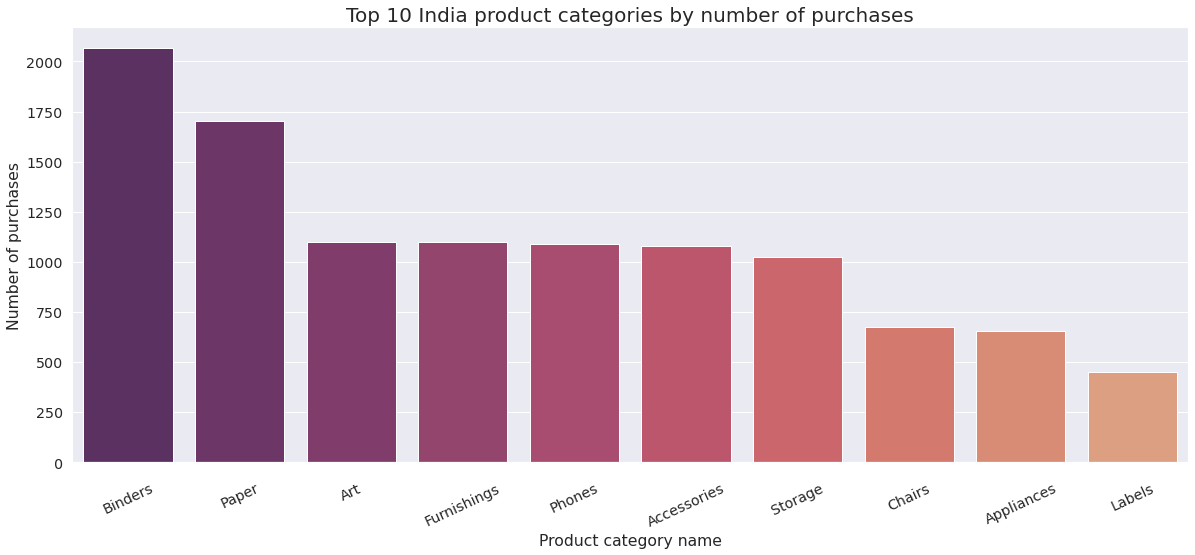

In [ ]:
# Plotting top 10 categories and their number of purchases
plt.figure(figsize=(20,8))
sns.set(font_scale = 1.3)
bar = sns.barplot(x="Product category name", y="Number of purchases", data=india_quant_top_10, ci=None, dodge=True, palette = 'flare_r')
bar.set_title('Top 10 India product categories by number of purchases', fontsize = 20)
bar.tick_params(axis='x', rotation=25, size=15)

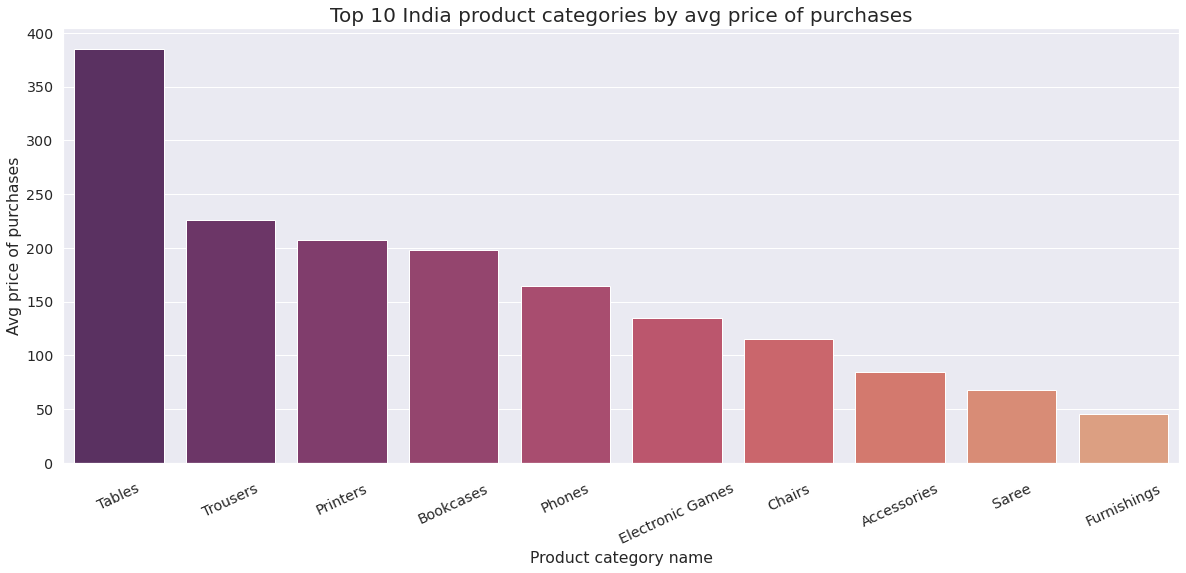

In [ ]:
# Plotting top 10 categories and their average price
plt.figure(figsize=(20,8))
sns.set(font_scale = 1.3)
bar_price = sns.barplot(x="Product category name", y="Avg price of purchases", data=india_cat_price_top_10, ci=None, dodge=True, palette = 'flare_r')
bar_price.set_title('Top 10 India product categories by avg price of purchases', fontsize = 20)
bar_price.tick_params(axis='x', rotation=25, size=15)

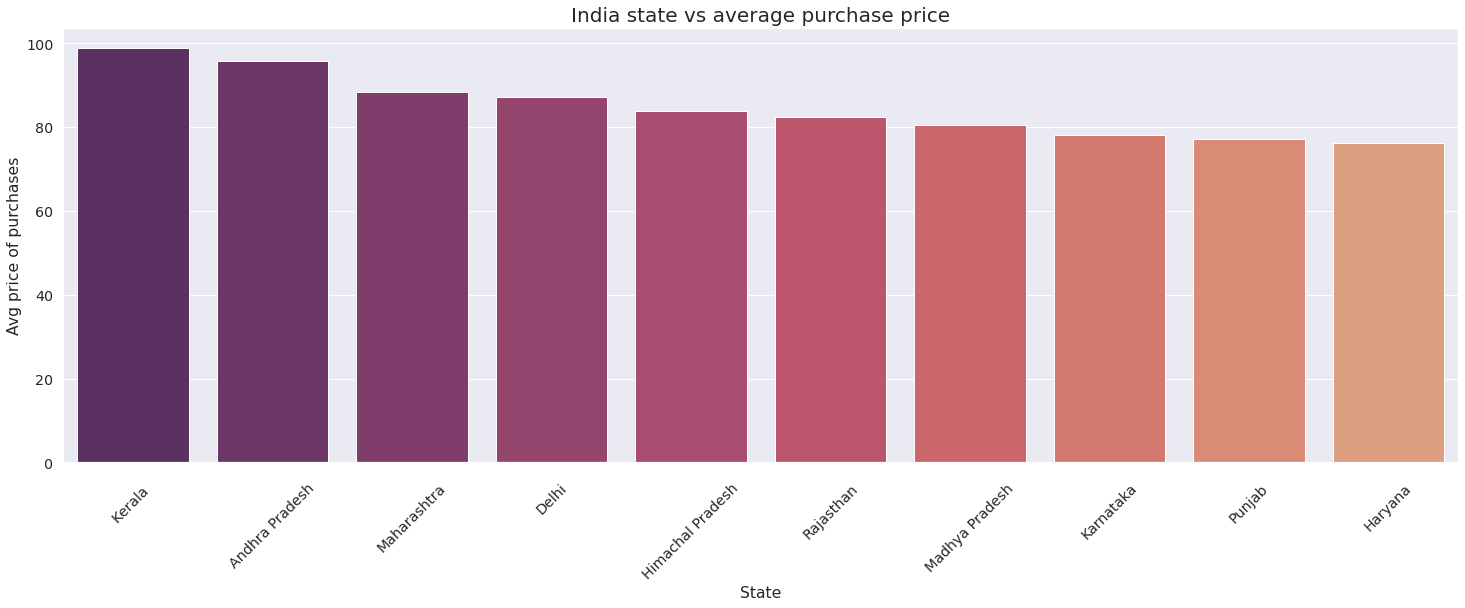

In [ ]:
# Plotting state vs average purchase price in US
plt.figure(figsize=(25,8))
sns.set(font_scale = 1.3)
bar_price = sns.barplot(x="State", y="Avg price of purchases", data=india_state_price_top_10, ci=None, dodge=True, palette = 'flare_r')
bar_price.set_title('India state vs average purchase price', fontsize = 20)
bar_price.tick_params(axis='x', rotation=45, size=15)

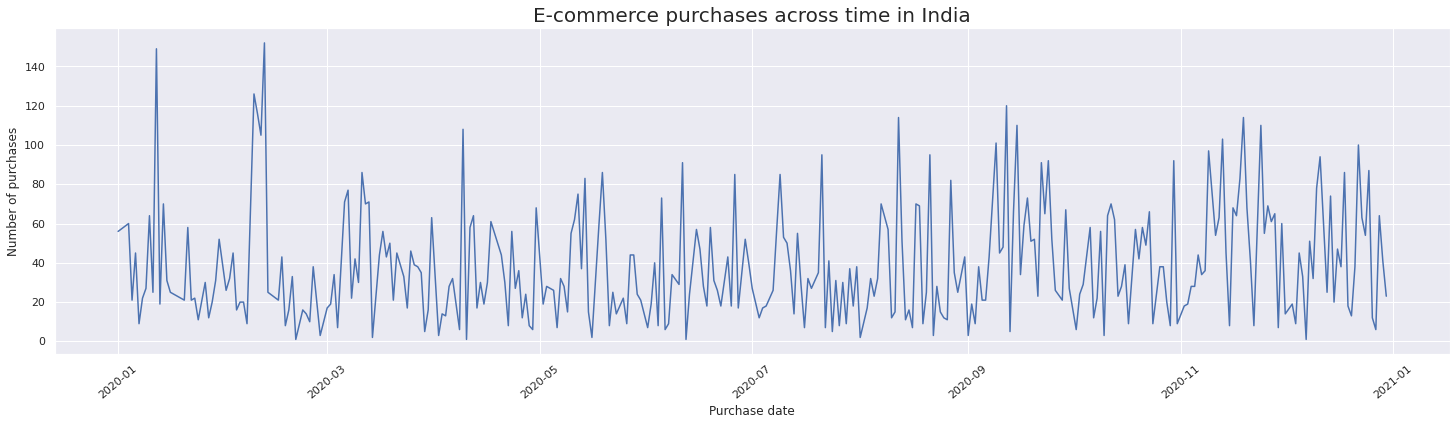

In [ ]:
# Plotting number of purchases by date 
india_purchases_time = india_df[['purchase_date', 'Quantity']].groupby(['purchase_date'])['Quantity'].sum().reset_index()
india_purchases_time = india_purchases_time.rename(columns={'purchase_date': 'Purchase date'})
india_purchases_time = india_purchases_time.rename(columns={'Quantity': 'Number of purchases'})
india_purchases_time = india_purchases_time.sort_values(by=['Purchase date'], ascending = True)
sns.set(font_scale = 1)
plt.figure(figsize=(25,6))
line_plot = sns.lineplot(x='Purchase date', y='Number of purchases', data=us_purchases_time, ci=None, palette = 'flare_r')
line_plot.set_title('E-commerce purchases across time in India', fontsize=20)
for item in line_plot.get_xticklabels():
    item.set_rotation(40)

### **Brazil Data**

In [ ]:
# Top 10 States in Brazil for Number E-Commerce Purchases
brazil_state_purchases = brazil_df[['customer_state_name', 'customer_id']].groupby(['customer_state_name']).count().reset_index()
brazil_state_purchases = brazil_state_purchases.rename(columns={'customer_state_name': 'Brazil States'})
brazil_state_purchases = brazil_state_purchases.rename(columns={'customer_id': 'Number of purchases'})

brazil_state_purchases = brazil_state_purchases.sort_values(by=['Number of purchases', 'Brazil States'], ascending = False)
brazil_state_purchases_top_10 = brazil_state_purchases.head(10)
brazil_state_purchases_top_10

# Top 10 categories in Brazil for e-commerce purchases by average price of purchases
brazil_cat_price = brazil_df[['price', 'product_category']].groupby(['product_category'])['price'].mean().reset_index()
brazil_cat_price = brazil_cat_price.rename(columns={'product_category': 'Product category name'})
brazil_cat_price = brazil_cat_price.rename(columns={'price': 'Avg price of purchases'})

brazil_cat_price = brazil_cat_price.sort_values(by=['Avg price of purchases'], ascending = False)
brazil_cat_price_top_10 = brazil_cat_price.head(10)
brazil_cat_price_top_10

brazil_cat_price_top_3 = brazil_cat_price.head(3)

# Top 10 categories in Brazil for e-commerce purchases by quantity of purchases
brazil_quant = brazil_df[['product_category', 'customer_id']].groupby(['product_category'])['customer_id'].count().reset_index()
brazil_quant = brazil_quant.rename(columns={'product_category': 'Product category name'})
brazil_quant = brazil_quant.rename(columns={'customer_id': 'Number of purchases'})

brazil_quant = brazil_quant.sort_values(by=['Number of purchases', 'Product category name'], ascending = False)
brazil_quant_top_10 = brazil_quant.head(10)
brazil_quant_top_10

,Product category name,Number of purchases
7,bed_bath_table,11137
43,health_beauty,9645
65,sports_leisure,8640
39,furniture_decor,8331
15,computers_accessories,7849
49,housewares,6943
70,watches_gifts,5950
68,telephony,4517
42,garden_tools,4329
5,auto,4213


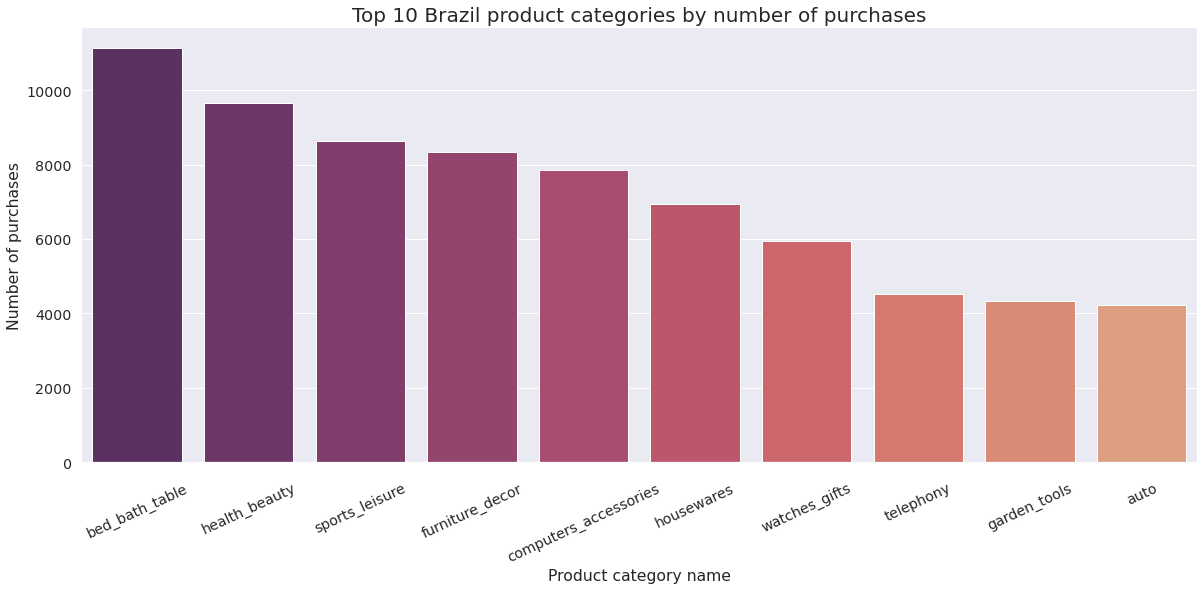

In [ ]:
# Plotting top 10 categories and their number of purchases
plt.figure(figsize=(20,8))
sns.set(font_scale = 1.3)
bar = sns.barplot(x="Product category name", y="Number of purchases", data=brazil_quant_top_10, ci=None, dodge=True, palette = 'flare_r')
bar.set_title('Top 10 Brazil product categories by number of purchases', fontsize = 20)
bar.tick_params(axis='x', rotation=25, size=15)

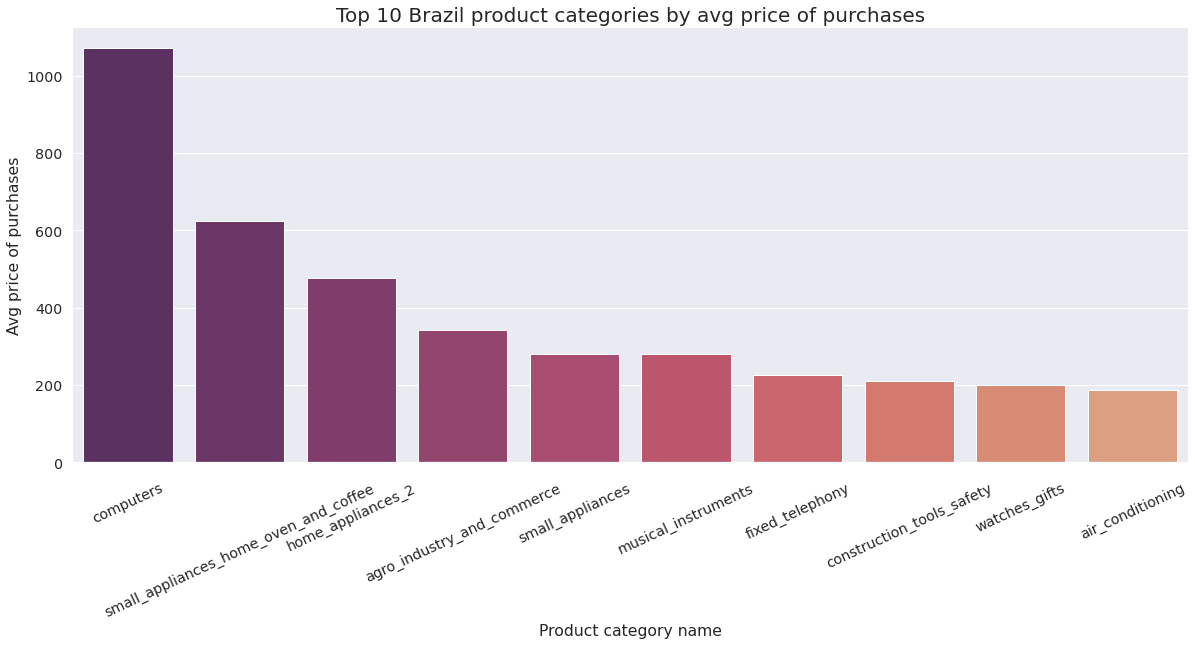

In [ ]:
# Plotting top 10 categories and their average price
plt.figure(figsize=(20,8))
sns.set(font_scale = 1.3)
bar_price = sns.barplot(x="Product category name", y="Avg price of purchases", data=brazil_cat_price_top_10, ci=None, dodge=True, palette = 'flare_r')
bar_price.set_title('Top 10 Brazil product categories by avg price of purchases', fontsize = 20)
bar_price.tick_params(axis='x', rotation=25, size=15)

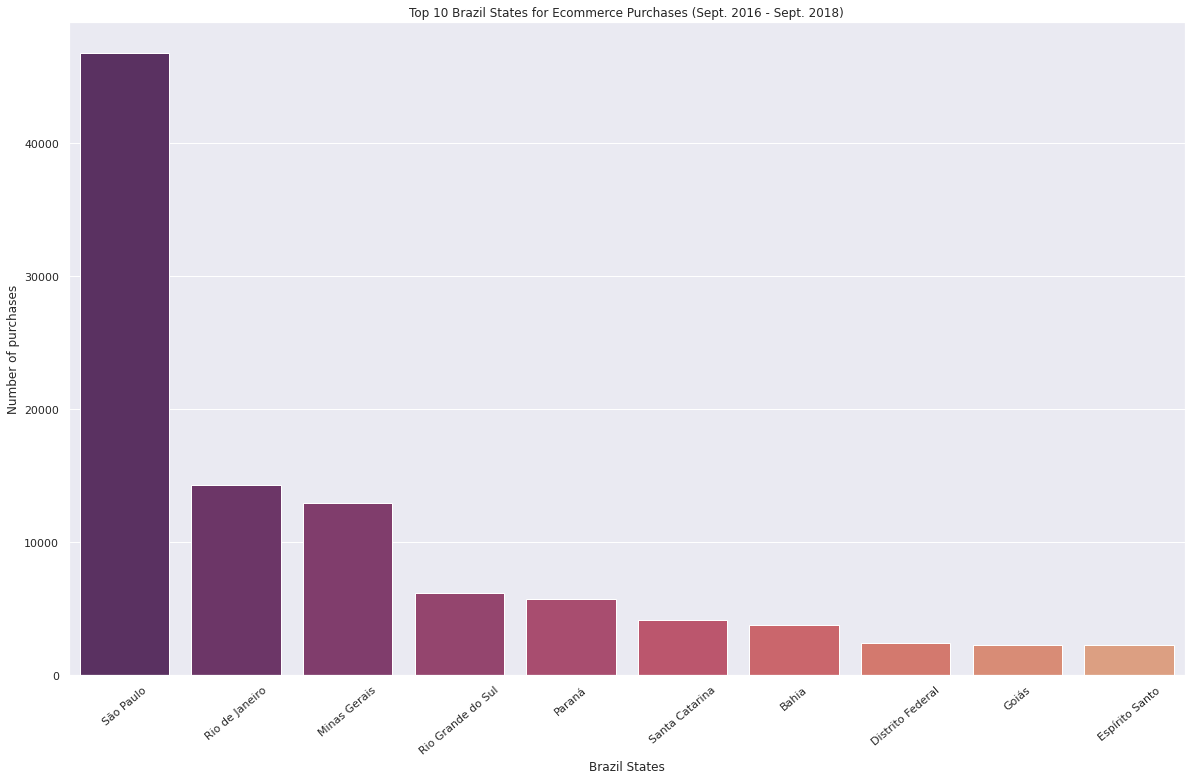

In [ ]:
# Plot top 10 States and their number of purchases
plt.figure(figsize=(20,12))
sns.set(font_scale = 1)
bar = sns.barplot(x="Brazil States", y="Number of purchases", data=brazil_state_purchases_top_10, ci=None, dodge=True, palette = 'flare_r')
bar.set_title('Top 10 Brazil States for Ecommerce Purchases (Sept. 2016 - Sept. 2018)')
for item in bar.get_xticklabels():
    item.set_rotation(40)

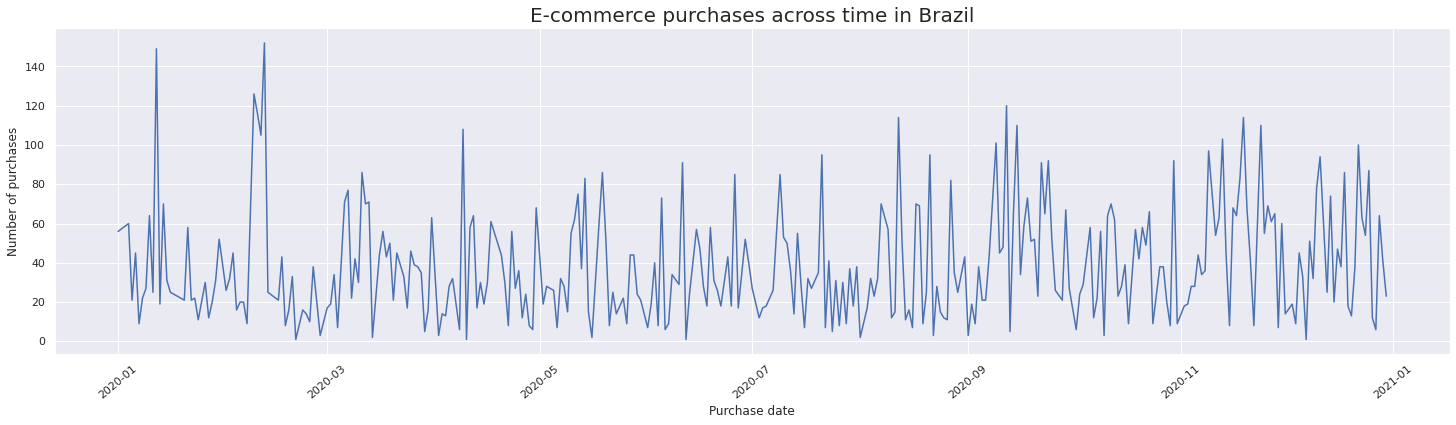

In [ ]:
# Plotting number of purchases by date 
brazil_purchases_time = brazil_df[['purchase_date', 'customer_id']].groupby(['purchase_date'])['customer_id'].count().reset_index()
brazil_purchases_time = brazil_purchases_time.rename(columns={'purchase_date': 'Purchase date'})
brazil_purchases_time = brazil_purchases_time.rename(columns={'Quantity': 'Number of purchases'})
brazil_purchases_time = brazil_purchases_time.sort_values(by=['Purchase date'], ascending = True)
sns.set(font_scale = 1)
plt.figure(figsize=(25,6))
line_plot = sns.lineplot(x='Purchase date', y='Number of purchases', data=us_purchases_time, ci=None, palette = 'flare_r')
line_plot.set_title('E-commerce purchases across time in Brazil', fontsize=20)
for item in line_plot.get_xticklabels():
    item.set_rotation(40)

### **Aggregate EDA**
Doing some EDA to compare data across countries:

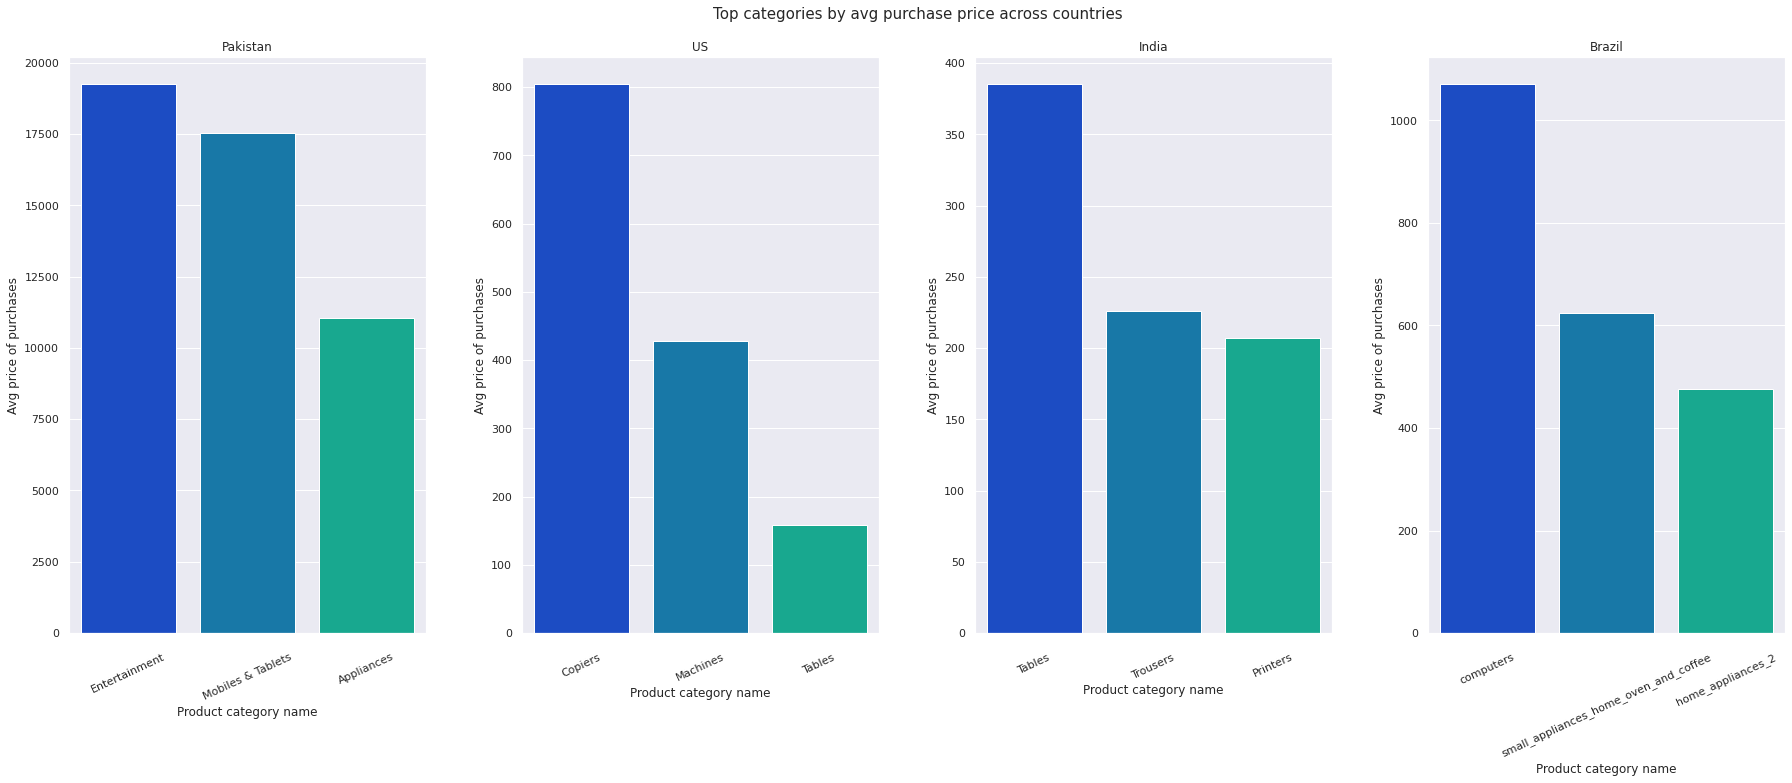

In [ ]:
fig, axs = plt.subplots(ncols=4)
plt.subplots_adjust(hspace = 0.8)
fig.set_size_inches(26,10)
sns.set(font_scale = 1)

# plt.subplots_adjust(right = 8)
fig.tight_layout(pad=5.0)
pakistan_bar = sns.barplot(x='Product category name', y='Avg price of purchases', data=pakistan_purchase_price_top_3,ax=axs[0], palette = 'winter')
pakistan_bar.tick_params(axis='x', rotation=25, size=15)
pakistan_bar.set_title('Pakistan')
us_bar = sns.barplot(x='Product category name', y='Avg price of purchases', data=us_quant_purchases_price_top_3,ax=axs[1], palette = 'winter')
us_bar.tick_params(axis='x', rotation=25, size=15)
us_bar.set_title('US')
india_bar = sns.barplot(x='Product category name', y='Avg price of purchases', data=india_cat_price_top_3,ax=axs[2], palette = 'winter')
india_bar.tick_params(axis='x', rotation=25, size=15)
india_bar.set_title('India')
brazil_bar = sns.barplot(x='Product category name', y='Avg price of purchases', data=brazil_cat_price_top_3,ax=axs[3], palette = 'winter')
brazil_bar.tick_params(axis='x', rotation=25, size=15)
brazil_bar.set_title('Brazil')


fig.suptitle('Top categories by avg purchase price across countries', fontsize=15)
plt.show()

## **Modeling**

After performing EDA on both the international and specific country’s ecommerce purchases, we notice that key features within notable datasets such as “united_states_df” have correlation to one another. We move onto the modeling section of our project in order to train Random Forest Classifiers that map the following factors to quantity purchased: discount, profit, price, purchase month and day, city labels, state labels, ship labels, postal labels, segment labels, product labels, customer labels, region labels. In addition, we perform logistic regression on the same  “united_states_df” features in order to check the accuracy in which the model predicts the quantity purchased of a consumer. Due to the imbalance of data with respect to differing quantities of the “united_states_df” dataset, we opt to use oversampling in order to address this imbalance. In order to tune the hyperparameters of the Random Forest Classifiers, we used RandomGridSearch to identify optimal hyperparameters. 

Our motive for using Random Forest Classifier as our model of choice was due to the fact that Random Forests utilize an ensemble method of bagging in order to avoid overfitting our input data. Especially as other methods such as Decision trees and logistic regression are prone to overfitting data, we wanted to utilize the Random Forest Classifier model. We then compare the Random Forest Classifier to a Logistic Regression classifier model in order to highlight how Random Forest Classifier trains and performs better on our data. Logistic regression typically is better suited for problems that simply require a 0 or 1 classification. Therefore, our hypothesis with the outcomes of both models is that our Random Forest Classifier, tuned with RandomGridSearch, will perform with a higher accuracy on the test data than logistic regression.


We first begin by applying PCA for dimentionality reduction, cutting down from our original 16 features to keep the components which explain the maximal amount of variance. 

In [ ]:
usa_df = united_states_df

In [ ]:
usa_df

,purchase_date,Ship Mode,Customer ID,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Sales,Quantity,Discount,Profit,price
0,2020-01-01,Standard Class,GA-14725,Consumer,United States,Lorain,Ohio,44052,East,FUR-FU-10003878,Furniture,Furnishings,48.896,4,0.2,8.5568,12.224
1,2020-01-01,Standard Class,SC-20725,Consumer,United States,Los Angeles,California,90036,West,FUR-FU-10001215,Furniture,Furnishings,474.430,11,0.0,199.2606,43.130
2,2020-01-01,First Class,DP-13390,Home Office,United States,Franklin,Wisconsin,53132,Central,OFF-BI-10002012,Office Supplies,Binders,3.600,2,0.0,1.7280,1.800
3,2020-01-01,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,77340,Central,OFF-ST-10002743,Office Supplies,Storage,454.560,5,0.2,-107.9580,90.912
4,2020-01-01,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,77340,Central,FUR-FU-10002116,Furniture,Furnishings,141.420,5,0.6,-187.3815,28.284
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3307,2020-12-30,Standard Class,PO-18865,Consumer,United States,New York City,New York,10009,East,TEC-PH-10004774,Technology,Phones,90.930,7,0.0,2.7279,12.990
3308,2020-12-30,Standard Class,PO-18865,Consumer,United States,New York City,New York,10009,East,OFF-BI-10003684,Office Supplies,Binders,52.776,3,0.2,19.7910,17.592
3309,2020-12-30,Standard Class,EB-13975,Corporate,United States,Fairfield,California,94533,West,OFF-BI-10002103,Office Supplies,Binders,13.904,2,0.2,4.5188,6.952
3310,2020-12-30,Standard Class,EB-13975,Corporate,United States,Fairfield,California,94533,West,OFF-BI-10004632,Office Supplies,Binders,20.720,2,0.2,6.4750,10.360


In [ ]:
usa_df['purchase_date'] = pd.to_datetime(usa_df['purchase_date'])

In [ ]:
# To get additional features for predictiom we split the purchase_date variable into the month and day

usa_df['purchase_month'] = usa_df['purchase_date'].apply(lambda x: x.month)
usa_df['purchase_day'] = usa_df['purchase_date'].apply(lambda x: x.day)

In [ ]:
usa_df.drop(['purchase_date', 'Sales'], axis = 1, inplace=True)

In [ ]:
categories = set(usa_df['Category'])
categories

{'Furniture', 'Office Supplies', 'Technology'}

In [ ]:
sub_categories = set(usa_df['Sub-Category'])
sub_categories

{'Accessories',
 'Appliances',
 'Art',
 'Binders',
 'Bookcases',
 'Chairs',
 'Copiers',
 'Envelopes',
 'Fasteners',
 'Furnishings',
 'Labels',
 'Machines',
 'Paper',
 'Phones',
 'Storage',
 'Supplies',
 'Tables'}

In [ ]:
set(usa_df['Country'])

{'United States'}

In [ ]:
#dropped the column because it only contains one value
usa_df.drop('Country', axis = 1, inplace=True)

To continue, we must use one-hot encoding for our categorical variables. The variables we do this to are the following: Ship Mode;	Customer ID; Segment;	City;	State;	Postal Code;	Region;	Product ID;	Category;	Sub-Category

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
city_labels = le.fit_transform(united_states_df['City'].astype(str))

In [ ]:
usa_df['city_labels'] = city_labels
state_labels = le.fit_transform(usa_df['State'].astype(str))
usa_df['state_labels'] = state_labels

category_labels = le.fit_transform(usa_df['Category'].astype(str))
usa_df['category_labels'] = category_labels

subcategory_labels = le.fit_transform(usa_df['Sub-Category'].astype(str))
usa_df['subcategory_labels'] = subcategory_labels

segment_labels = le.fit_transform(usa_df['Segment'].astype(str))
usa_df['segment_labels'] = segment_labels

customer_labels = le.fit_transform(usa_df['Customer ID'].astype(str))
usa_df['customer_labels'] = customer_labels

product_labels = le.fit_transform(usa_df['Product ID'].astype(str))
usa_df['product_labels'] = product_labels

region_labels = le.fit_transform(usa_df['Region'].astype(str))
usa_df['region_labels'] = region_labels

ship_labels = le.fit_transform(usa_df['Ship Mode'].astype(str))
usa_df['ship_labels'] = ship_labels

postal_labels = le.fit_transform(usa_df['Postal Code'].astype(str))
usa_df['postal_labels'] = postal_labels


In [ ]:
usa_df.drop('Postal Code', axis = 1, inplace=True)

We plot a correlation matrix in order to visualize the covariance of our features. As predicted, there is a pretty high correlation between the following pairs: profit and price (0.534406), region (0.510796) and postal code labels and subcategory and product labels (0.872467); however, since we consider them to be crucial for our training, we did not remove them. 

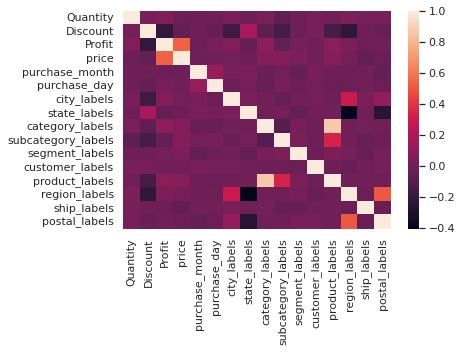

In [ ]:
usa_corr = usa_df.corr()

sns.heatmap(usa_corr)

In [ ]:
usa_corr

,Quantity,Discount,Profit,price,purchase_month,purchase_day,city_labels,state_labels,category_labels,subcategory_labels,segment_labels,customer_labels,product_labels,region_labels,ship_labels,postal_labels
Quantity,1.000000,0.019184,0.053766,-0.018078,-0.008991,-0.014933,0.022913,-0.021189,0.034496,-0.063212,-0.011122,0.021381,-0.002179,0.035348,0.017608,0.023084
Discount,0.019184,1.000000,-0.218343,-0.038950,-0.013126,-0.034259,-0.171402,0.176173,-0.059098,-0.145280,-0.014153,0.025955,-0.140133,-0.220437,-0.011966,-0.030170
Profit,0.053766,-0.218343,1.000000,0.534406,-0.009605,0.023879,0.052934,-0.032891,0.098144,-0.042724,0.006136,0.005523,0.079568,0.036709,-0.012162,0.002248
price,-0.018078,-0.038950,0.534406,1.000000,-0.009920,-0.000381,0.010207,-0.012046,0.062622,0.062076,0.029511,0.002776,0.067700,0.013256,-0.043703,-0.018391
purchase_month,-0.008991,-0.013126,-0.009605,-0.009920,1.000000,0.128030,0.023013,0.030542,-0.023055,0.008163,-0.039177,0.026934,-0.012097,-0.005424,-0.005097,-0.035302
purchase_day,-0.014933,-0.034259,0.023879,-0.000381,0.128030,1.000000,-0.017802,0.011622,-0.028668,0.026381,-0.015753,0.009687,-0.018716,-0.012475,0.005735,-0.020854
city_labels,0.022913,-0.171402,0.052934,0.010207,0.023013,-0.017802,1.000000,0.030480,0.001248,-0.032332,0.001051,0.016728,-0.011713,0.294492,0.031418,0.117065
state_labels,-0.021189,0.176173,-0.032891,-0.012046,0.030542,0.011622,0.030480,1.000000,-0.004635,0.007686,-0.043137,0.004289,0.004493,-0.406160,-0.004420,-0.259122
category_labels,0.034496,-0.059098,0.098144,0.062622,-0.023055,-0.028668,0.001248,-0.004635,1.000000,-0.092129,0.024680,-0.005995,0.872467,0.003740,0.011253,0.000222
subcategory_labels,-0.063212,-0.145280,-0.042724,0.062076,0.008163,0.026381,-0.032332,0.007686,-0.092129,1.000000,0.034978,-0.015090,0.338535,0.001036,-0.029713,-0.015169


In [ ]:
features = united_states_df[['price','Quantity', 'Discount', 'Profit',	
                             'purchase_month', 'purchase_day', 'city_labels',	'state_labels',
                             'category_labels',	'subcategory_labels', 'segment_labels',	
                             'customer_labels',	'product_labels',	'region_labels', 'ship_labels', 'postal_labels']]

labels = united_states_df['Quantity']

We plotted a histogram of the quantity purchased variable to make sure it has a good distribution. As you can see, the lower quantities are purchased more often.

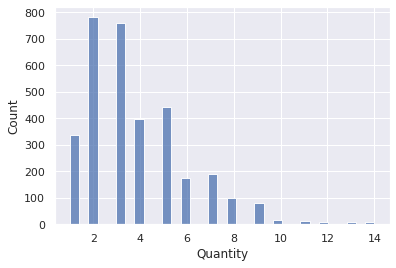

In [ ]:
sns.histplot(usa_df['Quantity'])

In [ ]:
set(united_states_df['Quantity'])

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14}

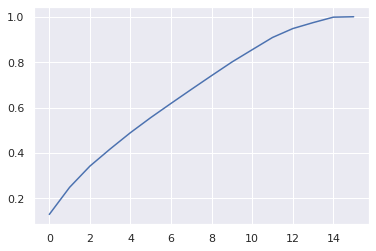

In [ ]:
# Running PCA to find the optimal # of components

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np 

X = StandardScaler().fit_transform(features)
pca = PCA(n_components=16)
X2 = pca.fit_transform(X)

# Plot explained variance ratio

np.set_printoptions(suppress=True)
pc_vs_variance = np.cumsum(pca.explained_variance_ratio_)

pc_vs_variance
plt.plot(pc_vs_variance)

By running our PCA on our original 16 components, we see that around 95% of variance can be explained by 14 components. We then use these 14 components and run a Naive Bayes classifer model to predict quantity purchased. However, the model's accuracy decreased significantly (from above 95% to around 50%) after applying PCA, which shows all the components are important for our analysis. This was also proved by the decrease in accuracy when we removed one of variables that was highly correlated with another. 

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

In [ ]:
pca = PCA(n_components=14)
scaler = StandardScaler()
x_train_pca = scaler.fit_transform(x_train)
x_test_pca = scaler.transform(x_test)
pca.fit(x_train_pca)
x_train_pca = pca.transform(x_train_pca)
x_test_pca = pca.transform(x_test_pca)

**Random Forest**

Next we want to look at using Random Forest classification model. The model helps Amazon to predict the quantity purchased based on several characteristics of a purchase (e.g. where the user lives, product category, product price, etc.) so that it can recommend buying/selling bulk products to certain customers/sellers and use relevant marketing strategies based on the predictions. We begin by using a Grid Search to select the best hyperparameters. We analyzed model's accuracy with and without applying PCA.

In [ ]:
# print out best parameters
def print_best_params(results):
    print('best_params: {}\n'.format(results.best_params_))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

#Tune hyperparameters that are available like depth and number of estimators using grid search 
#select the best hyperparameters out of those

param_grid = {
    'max_depth': [10, 20, 30, 40],
    'n_estimators': [16, 32, 64, 128]
}


rf = RandomForestClassifier()
rf_cv = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

rf_cv.fit(x_train_pca, y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30, 40],
                         'n_estimators': [16, 32, 64, 128]},
             verbose=2)

In [ ]:
print_best_params(rf_cv)


best_params: {'max_depth': 20, 'n_estimators': 128}



In [ ]:
clf = RandomForestClassifier(n_estimators = 128, max_depth= 40)
clf.fit(x_train_pca,y_train)
prediction = clf.predict(x_test_pca)

Model's accuracy (Trained after PCA)

In [ ]:
from sklearn.metrics import accuracy_score
test_accuracy = accuracy_score(y_test, prediction)
print(test_accuracy)

0.4841628959276018


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


#Tune hyperparameters that are available like depth and number of estimators using grid search 
#select the best hyperparameters out of those

rf = RandomForestClassifier()
rf_cv = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

rf_cv.fit(x_train, y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30, 40],
                         'n_estimators': [16, 32, 64, 128]},
             verbose=2)

In [ ]:
print_best_params(rf_cv)

best_params: {'max_depth': 30, 'n_estimators': 128}



In [ ]:
clf = RandomForestClassifier(n_estimators = 64, max_depth= 40)
clf.fit(x_train,y_train)
prediction = clf.predict(x_test)

Model's accuracy (without PCA)

In [ ]:
test_accuracy = accuracy_score(y_test, prediction)
print(test_accuracy)

0.9411764705882353


We also used a randomGridSearch to tune more hyperparameters. In both cases of with and without PCA, the accuracy increased by a small amount. 

In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [ ]:
#random search with PCA
#adapted from towards data science 

from sklearn.model_selection import RandomizedSearchCV
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 30, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(x_train_pca, y_train)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=30,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [ ]:
print_best_params(rf_random)

best_params: {'n_estimators': 1000, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 40, 'bootstrap': False}



In [ ]:
clf = RandomForestClassifier(n_estimators= 1800, min_samples_split= 2, 
                             min_samples_leaf= 2, max_features='auto', max_depth= 30, bootstrap=False)
clf.fit(x_train_pca,y_train)
prediction = clf.predict(x_test_pca)
test_accuracy = accuracy_score(y_test, prediction)
print(test_accuracy)

0.5007541478129713


In [ ]:
#random search without PCA

from sklearn.model_selection import RandomizedSearchCV
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 30, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(x_train_pca, y_train)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=30,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [ ]:
print_best_params(rf_random)

best_params: {'n_estimators': 1800, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 30, 'bootstrap': False}



In [ ]:
clf = RandomForestClassifier(n_estimators= 1600, min_samples_split= 2, 
                             min_samples_leaf= 1, max_features='auto', max_depth= 80, bootstrap=True)
clf.fit(x_train,y_train)
prediction = clf.predict(x_test)

In [ ]:
test_accuracy = accuracy_score(y_test, prediction)
print(test_accuracy)

0.9728506787330317


As seen in the quantity histogram, higher values are underrepresented in the dataset. We oversample them to address the data imbalance, and this increased the accuracy to 0.979

In [ ]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()
x_ros, y_ros = ros.fit_resample(x_train, y_train)

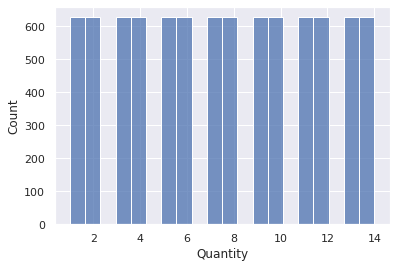

In [ ]:
sns.histplot(y_ros)

In [ ]:
clf = RandomForestClassifier(n_estimators= 1600, min_samples_split= 2, 
                             min_samples_leaf= 1, max_features='auto', max_depth= 80, bootstrap=True)
clf.fit(x_ros,y_ros)
prediction = clf.predict(x_test)

In [ ]:
test_accuracy = accuracy_score(y_test, prediction)
print(test_accuracy)

0.9788838612368024


We also plotted a confusion matrix, which shows that the model is performing pretty well over all classes. Unfortunately, some of the smaller classes are not even present in the dataset. 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


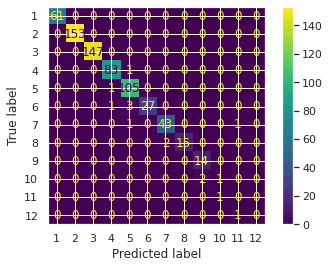

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(clf, x_test, y_test)  
plt.show()

We also tried dropping Profit which was highly correlated with price but it decreased the accuracy to 0.917.

In [ ]:
new_x_train = x_train.drop(['Profit'], axis = 1)
new_x_test = x_test.drop(['Profit'], axis = 1)

In [ ]:
clf = RandomForestClassifier(n_estimators= 1600, min_samples_split= 2, 
                             min_samples_leaf= 1, max_features='auto', max_depth= 80, bootstrap=True)
clf.fit(new_x_train,y_train)
prediction = clf.predict(new_x_test)
test_accuracy = accuracy_score(y_test, prediction)
print(test_accuracy)

0.9170437405731523


**Logistic Regression**

We also modeled the same question using LogisticRegression. With a max_iter number of 10000 the model did not converge and got an accuracy of 67% so we tried scaling the data and using PCA before using the model. Applying the pipeline improved the model's accuracy significantly to 90% but it still is below the accuracy for the RandomForest model. 

In [ ]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(max_iter=10000)
clf.fit(x_train,y_train)
prediction = clf.predict(x_test)

test_accuracy = accuracy_score(prediction,y_test)
print(test_accuracy)

0.6742081447963801


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
from sklearn.pipeline import Pipeline

scl = StandardScaler()
pca = PCA()
clf = LogisticRegression(max_iter=10000)
pipe = Pipeline(steps=[('Scale',scl),('PCA',pca),
       ('LogReg',clf)])

pipe.fit(x_train,y_train)
prediction = pipe.predict(x_test)


In [ ]:
test_accuracy = accuracy_score(prediction,y_test)
print(test_accuracy)

0.8989441930618401


The modeling shows that using a not very large dataset and given certain attributes of a potential order (e.g. customer's region, ID, price of the product, discount of the product, etc.) we can create a model that predicts the quantity purchased in the order. This will potentially help sellers and platforms like Amazon to adopt successful marketing strategies.

# **Conclusion**

We began this project with the cleaning and wrangling of 5 different datasets, one large one for international e-commerce followed by 4 country-specific datasets. We then went into EDA where we took a look at visualizations for each of the datasets to identify trends and popularity to draw insights from the data. We also conducted EDA on attributes of all the datasets together to compare insights between the different countries.

For the international dataset, we aimed to test our hypothesis that e-commerce demand and price have some correlation with one another. We also hypothesized that electronics would rank at the top for both the average price of purchase and the total number of purchases. In order to test our two hypotheses, we began by visualizing the top 20 most in-demand e-commerce products purchased in November 2019. We then performed a time-series analysis on the degree to which demand for e-commerce products, as well as average price, fluctuated throughout the month of November. From this EDA, we viewed that there were some correlations between demand for e-commerce products and average price. We hence looked into the Pearson correlation coefficient, as well as a linear regression plot, in order to conclude that average price and demand for the product have a moderate degree of correlation (~.3 Pearson score). Lastly, viewing that the top products and brands for both smartphone companies, we directed our attention to seeing whether we could model features of a customer’s e-commerce purchase to a sentiment score. 


For the individual country specific datasets we start with applying PCA to reduce the number of dimensions. Then we created a Random Forest classification model seeking to predict the quantity of the product purchased based on features of the product data such as the product category. Furthermore, to tune our hyperparameters, we use a randomGridSearch. 


## Description of Challenges/ Obstacles Faced

One of our central challenges in our final project centered around setting up our datasets for modeling, especially as many of the datasets did not include extensive amounts of features to inform the model's training and decision. Much of our data began as having around 5 to 7 columns, but through many joins and manipulations of the dataset to add new columns to the dataframes, we were able to generate datasets that ran successfully with many different classifiers, including random forests. 

Another difficulty we ran into was trying to find ways to connect all of our datasets, since the datasets for each specific one of our 4 countries varied greatly such as in terms of time, number of observations, variety of features, and more. In particular, the US dataset was focused on product categories of office supplies and furniture. Therefore, it was difficult for us to draw conclusions such as the most popular (or highest average price) of particular categories between countries — we also were limited in our ability to understand particular observations or calculations that stood out across all datasets. 

Additionally, we faced some difficulty dealing with the international e-commerce dataset with 60 million entries. In the beginning, we were considering utilizing Apache Spark to query the data; however, we realized that Pandas and Google Collab could handle the manipulation and cleaning of the data relatively smoothly without the help of Apache Spark. We, therefore, opted to use Pandas to process this dataset with 60 million rows. The difficult part was finding ways to clean and filter the data to decrease the row entries. After cleaning the data, our team was able to decrease the number of null and unformatted entries to have a data frame of 40 million entries. The process of cleaning this big dataset from 60 million rows to eventually 16 million rows in our phone dataset was difficult, especially as each operation required our team to be cognizant of the RAM Google Collab would have to incur. 


## Potential Next Steps/ Future Direction

Due to the large size of our international e-commerce dataset, we believe a potential next step could be using Apache Spark along with AWS Elastic Map Reduce. We would be able to partition our data across different cloud clusters which would allow us to do joins, groupbys, and masks in a more reasonable amount of time (on our current project, running the code with this dataset takes around 20 minutes). 


Another idea could be exploring the time dimension of our data. We can use tools like ARIMA to forecast seasonal data with trends. We could play around with different time visualizations including heatmaps or moving averages. 


Another cool idea could be to look into the geographic dispersion of our data, such as through creating a heatmap to see where in the world has the most dense purchasing volume. Plotting observations in a geographic space or creating a heatmap to illustrate this density both could be interesting visualizations. 
